# 1. Business Understanding
#### 1.1 Project Background

Imagine you're a small business owner who relies on a website to manage customer relationships, handle transactions, and communicate with clients. Like many users, you’re constantly online—navigating links from emails, social media, and suppliers. But as your business grows, so does the threat landscape around you. Cybercriminals are getting smarter, and phishing attacks are more sophisticated than ever, often hiding behind seemingly legitimate URLs. One wrong click, and you could be handing over sensitive data, from financial details to client information, putting your business and customers at serious risk.

This project aims to develop a machine learning model that can detect phishing URLs and deploy it as a web application, allowing users to input a URL and receive an immediate classification as either phishing or legitimate. By providing this accessible tool, we aim to help users avoid phishing scams and protect sensitive information.

#### 1.2 Business Objectives

The main objectives of this project include:
- ***High-Accuracy Phishing Detection***: Build a model that reliably distinguishes between phishing and legitimate URLs with an accuracy rate above 90%.
- ***User-Friendly Web Deployment***: Deploy the model as an intuitive web-based application where users can paste URLs and receive instant feedback, making it accessible to users without technical expertise.
- ***Real-Time Classification***: Ensure the web application provides classifications in real-time to minimize delays and improve usability.

#### 1.3 Stakeholders

The primary stakeholders involved in and impacted by this project are:
- ***Business Users (Small to Medium Enterprises)***: Owners, employees, and administrators who frequently navigate emails and online transactions and need a way to verify URLs for security.
- ***Individual Users (General Public)***: Everyday internet users who want a quick, reliable way to avoid phishing attacks and protect their personal data.
- ***Cybersecurity Teams***: Professionals in organizations who may incorporate this tool as part of a broader security protocol to preempt phishing threats.

#### 1.4 Success Criteria & Key Performance Indicators

To gauge the success of this project, we will track the following metrics:
- ***Model Accuracy***: Achieve a minimum accuracy of 90% on test data, aiming for a high true-positive rate (correctly identifying phishing URLs).
- ***False Positive Rate***: Maintain a low false-positive rate to avoid incorrectly labeling legitimate URLs as phishing, which could decrease user trust.
- ***Response Time***: Ensure URL classifications are provided within 1-2 seconds to optimize user experience.

#### 1.5 Expected Business Impact
- Financial Protection: Minimizes the risk of financial loss from phishing scams, especially for small businesses and individuals.
- Improved User Trust and Confidence: Builds user trust by offering a reliable tool for verifying URL safety.
- Enhanced Cybersecurity Strategy: Adds an additional layer of security to prevent phishing attacks, which is beneficial for organizations incorporating this tool into their cybersecurity protocols.

# 2. Data Understanding

#### 2.1 Loading inital data
The dataset we have is from ***Mendely*** which is stored in a folder on Google Drive known as ***Phishing Website Detection Dataset***

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Read the benign URLs from the text file
with open('/content/drive/MyDrive/Phishing Website Detection Dataset/Data/Train/benign_Train.txt', 'r') as benign_train:
    # Read the content and split into lines
    benign_train = benign_train.read().strip().split('\n')

# Convert the list of URLs into a DataFrame
benign_df = pd.DataFrame(benign_train, columns=['url'])

# Display the DataFrame
print(benign_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                 url
0             karens-krazy-korner.blogspot.com/2010/
1    www.tmentertainment.com/ccount/click.php?id=173
2  asian.videos.xblog.in/thai-wife-get-fuck-by-hu...
3               kpn.se/resurser/bilder-att-farglagga
4     www.indokitay.ru/landing/toniki-aasha-herbals/


In [298]:
benign_df['label'] = 'benign'
benign_df.head()

,url,label
0,karens-krazy-korner.blogspot.com/2010/,benign
1,www.tmentertainment.com/ccount/click.php?id=173,benign
2,asian.videos.xblog.in/thai-wife-get-fuck-by-hu...,benign
3,kpn.se/resurser/bilder-att-farglagga,benign
4,www.indokitay.ru/landing/toniki-aasha-herbals/,benign


In [ ]:
# Read the malign URLs from the text file
with open('/content/drive/MyDrive/Phishing Website Detection Dataset/Data/Train/malign_Train.txt', 'r') as malign_train:
    # Read the content and split into lines
    malign_train = malign_train.read().strip().split('\n')

# Convert the list of URLs into a DataFrame
malign_df = pd.DataFrame(malign_train, columns=['url'])

# Display the DataFrame
print(malign_df.head())


                                                url
0                    bosquedarobina.blogspot.com.au
1                                   get.aknigi.club
2  amazon.com/experiment-adrien-brody/dp/b003vel9ei
3                          sexymaryjane.blogspot.be
4                             linkfreak.blogspot.de


In [ ]:
malign_df['label'] = 'malignant'
malign_df.head()

,url,label
0,bosquedarobina.blogspot.com.au,malignant
1,get.aknigi.club,malignant
2,amazon.com/experiment-adrien-brody/dp/b003vel9ei,malignant
3,sexymaryjane.blogspot.be,malignant
4,linkfreak.blogspot.de,malignant


In [ ]:
# Read the benign URLs from the text file
with open('/content/drive/MyDrive/Phishing Website Detection Dataset/Data/Test/benign_Test.txt', 'r') as benign_test:
    # Read the content and split into lines
    benign_test_urls = benign_test.read().strip().split('\n')

# Convert the list of URLs into a DataFrame
benign_test_df = pd.DataFrame(benign_test_urls, columns=['url'])

# Display the DataFrame
print(benign_test_df.head())


                                                 url
0  eijikiriyama.com/tag/%e7%a8%8e%e7%90%86%e5%a3%ab/
1  terrasunt24.de/kfz-halter-halterung-hr-mfm-fur...
2  english.china.com/news/china/54/20170721/10265...
3         sufriche.blogspot.com/2016/11/velas-i.html
4  keymakeup061.blogspot.com/2016/03/arrowhead-20...


In [ ]:
benign_test_df['label'] = 'benign'
benign_test_df.head()

,url,label
0,eijikiriyama.com/tag/%e7%a8%8e%e7%90%86%e5%a3%ab/,benign
1,terrasunt24.de/kfz-halter-halterung-hr-mfm-fur...,benign
2,english.china.com/news/china/54/20170721/10265...,benign
3,sufriche.blogspot.com/2016/11/velas-i.html,benign
4,keymakeup061.blogspot.com/2016/03/arrowhead-20...,benign


In [ ]:
# Read the malign URLs from the text file
with open('/content/drive/MyDrive/Phishing Website Detection Dataset/Data/Test/malign_Test.txt', 'r') as malign_test:
    # Read the content and split into lines
    malign_test_urls = malign_test.read().strip().split('\n')

# Convert the list of URLs into a DataFrame
malign_test_df = pd.DataFrame(malign_test_urls, columns=['url'])

# Display the DataFrame
print(malign_test_df.head())


                         url
0  brielletlrapq.blogspot.mx
1               imgshost.pro
2          ipw.metadsp.co.uk
3       amvoyeur.blogspot.lt
4     edgecommunications.com


In [ ]:
malign_test_df['label'] = 'malignant'
malign_test_df.head()

,url,label
0,brielletlrapq.blogspot.mx,malignant
1,imgshost.pro,malignant
2,ipw.metadsp.co.uk,malignant
3,amvoyeur.blogspot.lt,malignant
4,edgecommunications.com,malignant


> **Key Insights:**
>- Both `training` and `test` datasets have been structured as DataFrames containing a single column, url, which holds the website links.
>- `Benign URLs` typically include recognizable domain names, familiar extensions (e.g., .com, .ru, .de), and often follow predictable structures.
>- `Malignant URLs` include domain names that might seem familiar but are subtly altered or use unusual domain extensions (e.g., .mx, .lt, .club)

In [ ]:
data = pd.concat([benign_df, malign_df, benign_test_df, malign_test_df], axis=0)
data.head()

,url,label
0,karens-krazy-korner.blogspot.com/2010/,benign
1,www.tmentertainment.com/ccount/click.php?id=173,benign
2,asian.videos.xblog.in/thai-wife-get-fuck-by-hu...,benign
3,kpn.se/resurser/bilder-att-farglagga,benign
4,www.indokitay.ru/landing/toniki-aasha-herbals/,benign


In [ ]:
print('benign_df', len(benign_df)/len(data)*100)
print('malign_df', len(malign_df)/len(data)*100)
print('benign_test_df', len(benign_test_df)/len(data)*100)
print('malign_test_df', len(malign_test_df)/len(data)*100)
print('total', ((len(benign_df)+ len(malign_df) + len(benign_test_df) + len(malign_test_df)))/len(data)*100)

benign_df 30.449816874801318
malign_df 30.449816874801318
benign_test_df 16.56039173080413
malign_test_df 22.53997451959324
total 100.0


In [ ]:
print('benign_df', len(benign_df))
print('malign_df', len(malign_df))
print('benign_test_df', len(benign_test_df))
print('malign_test_df', len(malign_test_df))
print('total', ((len(benign_df)+ len(malign_df) + len(benign_test_df) + len(malign_test_df))))

benign_df 2000000
malign_df 2000000
benign_test_df 1087717
malign_test_df 1480467
total 6568184


In [ ]:
data_sample = data.sample(n=10000, random_state=42)
data_sample.head()

,url,label
1638534,www.experiencecanyonroad.com/countertop-att/69...,benign
12500,someyummystuff.tumblr.com,malignant
999808,www.baby-markt.ch/noukie-s-boys-schlafanzug-1-...,benign
470767,www.public.navy.mil,malignant
834104,x9.yhiroxzl.com,malignant


In [596]:
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from urllib.parse import urlparse
import warnings
from requests.packages.urllib3.exceptions import InsecureRequestWarning
import logging

# Suppress InsecureRequestWarning
warnings.simplefilter('ignore', InsecureRequestWarning)

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class URLProcessor:
    def __init__(self, timeout=20, max_workers=1000, batch_size=10000):
        self.timeout = timeout
        self.max_workers = max_workers
        self.batch_size = batch_size
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }

    def is_website_live(self, url):
        """Check if a single website is live by trying both the direct and 'www' prefixed URLs."""
        # Ensure URL has http/https
        url = self.ensure_http_scheme(url)

        # Try without "www" first
        if self.check_url(url):
            return True

        # Retry with "www" if the first attempt fails
        url_with_www = self.add_www_prefix(url)
        return self.check_url(url_with_www)

    def ensure_http_scheme(self, url):
        """Ensure the URL has http/https scheme."""
        if not url.startswith(('http://', 'https://')):
            return 'http://' + url
        return url

    def add_www_prefix(self, url):
        """Add 'www' to the URL if it's not already there."""
        if not urlparse(url).netloc.startswith("www."):
            return url.replace("://", "://www.")
        return url

    def check_url(self, url):
        """Attempt to access a URL to see if it’s live."""
        try:
            response = requests.get(url, headers=self.headers, timeout=self.timeout, verify=False)
            return response.status_code == 200
        except requests.RequestException as e:
            logging.debug(f"Failed to reach {url}: {e}")
            return False

    def check_urls_concurrently(self, urls):
        """Check a batch of URLs concurrently using ThreadPoolExecutor."""
        results = {}
        with ThreadPoolExecutor(max_workers=self.max_workers) as executor:
            future_to_url = {executor.submit(self.is_website_live, url): url for url in urls}
            for future in as_completed(future_to_url):
                url = future_to_url[future]
                try:
                    results[url] = future.result()
                except Exception as e:
                    logging.error(f"Error processing {url}: {e}")
                    results[url] = False  # Mark as not live if there's an error
        return results

    def process_in_batches(self, data):
        """Process the URLs in the DataFrame in batches, checking if each is live."""
        all_results = []

        for i in range(0, len(data), self.batch_size):
            batch_data = data.iloc[i:i + self.batch_size]
            batch_urls = batch_data['url'].tolist()
            logging.info(f"Processing batch {i // self.batch_size + 1} of {len(data) // self.batch_size + 1}")

            # Get live status results
            batch_results = self.check_urls_concurrently(batch_urls)

            # Add results to the DataFrame
            batch_data = batch_data.copy()  # Avoid modifying original DataFrame
            batch_data['is_website_live'] = batch_data['url'].map(batch_results)
            all_results.append(batch_data)

        # Combine all results into a single DataFrame
        final_df = pd.concat(all_results).reset_index(drop=True)
        return final_df


In [ ]:
checker = URLProcessor(timeout=10, max_workers=5000, batch_size=5000)

# Run the batch processing
live_url_check = checker.process_in_batches(data_sample)

# Display the results
live_url_check.head()


,url,label,is_website_live
0,www.experiencecanyonroad.com/countertop-att/69...,benign,False
1,someyummystuff.tumblr.com,malignant,True
2,www.baby-markt.ch/noukie-s-boys-schlafanzug-1-...,benign,False
3,www.public.navy.mil,malignant,False
4,x9.yhiroxzl.com,malignant,False


In [ ]:
live_url_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              10000 non-null  object
 1   label            10000 non-null  object
 2   is_website_live  10000 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 166.1+ KB


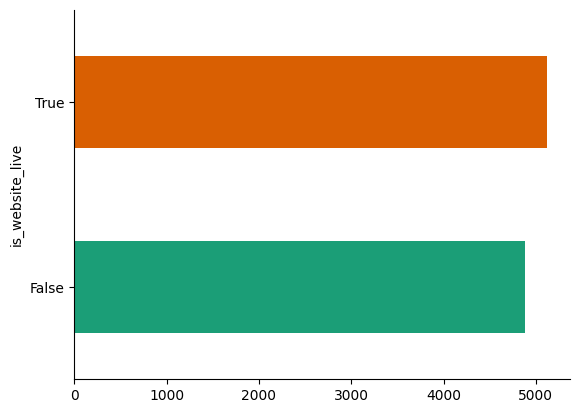

In [ ]:
# @title is_website_live

from matplotlib import pyplot as plt
import seaborn as sns
live_url_check.groupby('is_website_live').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.describe()

,url,label
count,6568184,6568184
unique,6551802,2
top,103.234.36.75/rd927.exe,malignant
freq,27,3480467


In [ ]:
live_url_check.describe()

,url,label,is_website_live
count,10000,10000,10000
unique,10000,2,2
top,www.experiencecanyonroad.com/countertop-att/69...,malignant,True
freq,1,5352,5117


In [ ]:
live_url_check[live_url_check['is_website_live'] == True].head()


,url,label,is_website_live
1,someyummystuff.tumblr.com,malignant,True
10,freenudebabes.blogspot.com.tr,malignant,True
13,amateursexporn.org,malignant,True
14,www.tchprint.pl/,benign,True
19,casaindonesia.com,malignant,True


In [ ]:
live_sample = live_url_check[live_url_check['is_website_live'] == True].sample(50)
live_sample.head()

,url,label,is_website_live
7175,www.moriya-s.co.jp/publics/index/30/,benign,True
2899,auoeolebx.blogspot.sg,malignant,True
4334,www.bikeworld.fi/veneet-peramoottorit/nimbus/d...,benign,True
3777,www.kooshigourmet.com/pages/faqs,benign,True
1766,jessica-simpson-picture.blogspot.ru,malignant,True


In [ ]:
!pip install rapidfuzz

In [ ]:
import aiohttp
import asyncio
import pandas as pd
import logging
from bs4 import BeautifulSoup
import random
from typing import List, Tuple
from urllib.parse import urlparse
from rapidfuzz import fuzz
import time
from dataclasses import dataclass

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

@dataclass
class ProcessorConfig:
    timeout: int = 30
    max_concurrent_requests: int = 500
    retries: int = 3
    wait_time: float = 1.0
    backoff_min: float = 1.0
    backoff_max: float = 3.0
    chunk_size: int = 500

class URLProcessor:
    def __init__(self, config: ProcessorConfig):
        self.config = config

    async def fetch_metadata(self, url: str) -> Tuple[str, str]:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        retries = self.config.retries
        backoff_min, backoff_max = self.config.backoff_min, self.config.backoff_max

        if not url.startswith(('http://', 'https://')):
            url = 'http://' + url

        for attempt in range(retries):
            try:
                async with aiohttp.ClientSession() as session:
                    async with session.get(url, headers=headers, timeout=self.config.timeout) as response:
                        if response.status == 200:
                            html = await response.text()
                            soup = BeautifulSoup(html, 'html.parser')
                            title = soup.title.string.strip() if soup.title else 'No Title'
                            meta_desc = (
                                soup.find('meta', attrs={'name': 'description'}) or
                                soup.find('meta', attrs={'property': 'og:description'}) or
                                soup.find('meta', attrs={'name': 'twitter:description'})
                            )
                            description = meta_desc['content'].strip() if meta_desc else 'No Description'
                            return title, description
                        elif response.status == 429:
                            retry_after = int(response.headers.get('Retry-After', 60))
                            logging.warning(f"Rate limited for {url}. Waiting {retry_after}s")
                            await asyncio.sleep(retry_after)
            except Exception as e:
                logging.error(f"Attempt {attempt + 1} failed for {url}: {e}")
                if attempt < retries - 1:
                    backoff_time = random.uniform(backoff_min, backoff_max) * (attempt + 1)
                    await asyncio.sleep(backoff_time)

        return 'No Title', 'No Description'

    async def process_urls_metadata(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        urls = df[url_column].tolist()
        results = []
        start_time = time.time()

        for i in range(0, len(urls), self.config.chunk_size):
            chunk_urls = urls[i:i + self.config.chunk_size]
            chunk_results = await self._process_chunk(chunk_urls)
            results.extend(chunk_results)

            processed = len(results)
            elapsed = time.time() - start_time
            rate = processed / elapsed if elapsed > 0 else 0
            logging.info(f"Processed {processed}/{len(urls)} URLs at {rate:.1f} URLs/sec")

        metadata_df = pd.DataFrame(results, columns=['title', 'description'])
        final_df = pd.concat([df.reset_index(drop=True), metadata_df], axis=1)

        success_rate = sum(1 for r in results if r[0] != 'No Title') / len(results) * 100
        logging.info(f"Final Success Rate: {success_rate:.1f}%")
        logging.info(f"Total Time: {time.time() - start_time:.1f} seconds")
        return final_df

    async def _process_chunk(self, urls: List[str]) -> List[Tuple[str, str]]:
        semaphore = asyncio.Semaphore(self.config.max_concurrent_requests)

        async def fetch_with_semaphore(url: str) -> Tuple[str, str]:
            async with semaphore:
                return await self.fetch_metadata(url)

        return await asyncio.gather(*[fetch_with_semaphore(url) for url in urls])

    def compute_content_similarity(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        title_similarity_bins = []
        description_similarity_bins = []

        for _, row in df.iterrows():
            url = row[url_column]
            title = row['title']
            description = row['description']

            # Calculate title similarity
            title_similarity_score = fuzz.token_set_ratio(url, title) if title != "No Title" else 0
            title_similarity_bins.append(self.assign_similarity_bin(title_similarity_score))

            # Calculate description similarity with separate handling for "No Description"
            if description == "No Description":
                description_similarity_bins.append("No Description")
            else:
                description_similarity_score = fuzz.token_set_ratio(url, description)
                description_similarity_bins.append(self.assign_similarity_bin(description_similarity_score))

        df['title_similarity_bin'] = title_similarity_bins
        df['description_similarity_bin'] = description_similarity_bins

        return df

    @staticmethod
    def assign_similarity_bin(score: int) -> str:
        if score >= 80:
            return "Highly Similar"
        elif score >= 50:
            return "Moderately Similar"
        elif score >= 20:
            return "Slightly Similar"
        else:
            return "Not Similar"

In [ ]:
import nest_asyncio
nest_asyncio.apply()

# Initialize the ProcessorConfig and URLProcessor
config = ProcessorConfig(timeout=10, max_concurrent_requests=1000, retries=1, chunk_size=1000)
processor = URLProcessor(config)

# Run the metadata fetching process
async def run_metadata_test():
    result_df = await processor.process_urls_metadata(live_url_check, url_column='url')
    return result_df

# Run the asynchronous metadata fetching
described_df = asyncio.run(run_metadata_test())
described_df.head()


ERROR:root:Attempt 1 failed for http://www.experiencecanyonroad.com/countertop-att/698037/how-to-get-rid-of-oil-stains-on-granite-countertops-7-remove-water-marks-stains-you-oil-stained-granite-stone-essentials-stonecare-advisor.html: Cannot connect to host www.experiencecanyonroad.com:80 ssl:default [Name or service not known]
ERROR:root:Attempt 1 failed for http://cs69239801.wac.edgecastcdn.net: Cannot connect to host cs69239801.wac.edgecastcdn.net:80 ssl:default [Name or service not known]
ERROR:root:Attempt 1 failed for http://www.public.navy.mil: Cannot connect to host www.public.navy.mil:80 ssl:default [Name or service not known]
ERROR:root:Attempt 1 failed for http://x9.yhiroxzl.com: Cannot connect to host x9.yhiroxzl.com:80 ssl:default [Name or service not known]
ERROR:root:Attempt 1 failed for http://app.5miles.us: Cannot connect to host app.5miles.us:80 ssl:default [Name or service not known]
ERROR:root:Attempt 1 failed for http://taxfilingonline.us/legal-memo-format: Cannot 

In [ ]:
described_df[19:25].head()

,url,label,is_website_live,title,description
19,casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...
20,elviaemontemayor.blogspot.com/2008/02/hate-bea...,benign,True,elvia montemayor illustrator and graphic desig...,Acrylics.
21,hamburgtwplibrary.blogspot.com/2015/07/zinio-d...,benign,True,No Title,No Description
22,chicagodentalhealth.com/hours-and-directions/,benign,True,No Title,No Description
23,ima9ines.com/en/products,benign,True,No Title,No Description


In [ ]:
config = ProcessorConfig()
processor = URLProcessor(config)


described_with_scores = processor.compute_content_similarity(described_df, url_column='url')

In [ ]:
described_df[(described_df['title'] != 'No Title') & (described_df['description'] != 'No Description')].head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin
19,casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar
20,elviaemontemayor.blogspot.com/2008/02/hate-bea...,benign,True,elvia montemayor illustrator and graphic desig...,Acrylics.,Slightly Similar,Not Similar
24,musiprofejesus.blogspot.com/2009/07/body-percu...,benign,True,BODY PERCUSSION,Una nova modalitat de percussió que ara està m...,Not Similar,Slightly Similar
55,counterfem2.blogspot.com/2016/01/feminist-triu...,benign,True,The Counter-Feminist 2: Feminist Triumphalism ...,Feminist Triumphalism and Feminist Subjectivis...,Slightly Similar,Slightly Similar
71,thejapanfoundation.blogspot.com/2010/02/this-i...,benign,True,THIS IS IT！（その1）A Worldful of Friends : The Ja...,こんにちは。マニラの三富です。 日本では、マイケル・ジャクソンのDVD「THIS IS IT...,Slightly Similar,Not Similar


In [ ]:
described_with_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         10000 non-null  object
 1   label                       10000 non-null  object
 2   is_website_live             10000 non-null  bool  
 3   title                       10000 non-null  object
 4   description                 10000 non-null  object
 5   title_similarity_bin        10000 non-null  object
 6   description_similarity_bin  10000 non-null  object
dtypes: bool(1), object(6)
memory usage: 478.6+ KB


In [ ]:
!pip install python-whois

In [306]:
import asyncio
import pandas as pd
import logging
from whois import whois
from urllib.parse import urlparse
from dataclasses import dataclass
from typing import Optional, Tuple

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

@dataclass
class ProcessorConfig:
    max_concurrent_requests: int = 10
    batch_size: int = 100
    wait_time: float = 1.0
    timeout: int = 10  # Timeout for WHOIS requests

class URLProcessor:
    def __init__(self, config: ProcessorConfig):
        self.config = config

    async def fetch_whois_data(self, domain: str) -> Tuple[Optional[str], Optional[str]]:
        """Fetches creation and expiration dates from WHOIS data with timeout handling."""
        try:
            whois_data = await asyncio.to_thread(whois, domain)
            creation_date = str(whois_data.creation_date[0]) if isinstance(whois_data.creation_date, list) else str(whois_data.creation_date)
            expiry_date = str(whois_data.expiration_date[0]) if isinstance(whois_data.expiration_date, list) else str(whois_data.expiration_date)
            return creation_date, expiry_date
        except asyncio.TimeoutError:
            logging.warning(f"Timeout fetching WHOIS data for {domain}.")
            return None, None
        except Exception as e:
            logging.warning(f"Error fetching WHOIS data for {domain}: {e}")
            return None, None

    async def update_dataframe_with_whois(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """Updates the DataFrame with WHOIS creation and expiry dates."""
        # Ensure URLs have "http://" if missing
        df[url_column] = df[url_column].apply(lambda url: f"http://{url}" if not urlparse(url).scheme else url)
        urls = df[url_column].tolist()

        creation_dates = []
        expiry_dates = []
        semaphore = asyncio.Semaphore(self.config.max_concurrent_requests)

        async def fetch_with_semaphore(url):
            async with semaphore:
                return await self.fetch_whois_data(urlparse(url).netloc)

        for i in range(0, len(urls), self.config.batch_size):
            batch_urls = urls[i:i + self.config.batch_size]
            logging.info(f"Processing WHOIS batch {i // self.config.batch_size + 1} of {len(urls) // self.config.batch_size + 1}")

            # Fetch WHOIS data concurrently for the batch
            batch_results = await asyncio.gather(*(fetch_with_semaphore(url) for url in batch_urls), return_exceptions=True)

            # Process results, handling any None or exceptions
            for result in batch_results:
                if isinstance(result, Exception):
                    creation_dates.append(None)
                    expiry_dates.append(None)
                else:
                    creation_dates.append(result[0])
                    expiry_dates.append(result[1])

            # Wait before the next batch
            if i + self.config.batch_size < len(urls):
                logging.info(f"Waiting for {self.config.wait_time} seconds before processing the next batch...")
                await asyncio.sleep(self.config.wait_time)

        # Update the DataFrame with the fetched data
        df['creation_date'] = creation_dates
        df['expiry_date'] = expiry_dates
        return df

    async def process_whois_data(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """Public method to fetch and update WHOIS data in the DataFrame."""
        logging.info("Starting WHOIS data processing...")
        updated_df = await self.update_dataframe_with_whois(df, url_column)
        logging.info("Completed WHOIS data processing.")
        return updated_df


In [307]:
# Initialize ProcessorConfig and URLProcessor
config = ProcessorConfig(max_concurrent_requests=1000, batch_size=1000, wait_time=10, timeout=10)
processor = URLProcessor(config)

# Run WHOIS data fetching
async def run_whois_test():
    result_df = await processor.process_whois_data(described_with_scores, url_column='url')
    return result_df

# Execute the asynchronous WHOIS processing
who_is_df = asyncio.run(run_whois_test())
who_is_df.head()


Streaming output truncated to the last 5000 lines.
reserves the right to modify these terms at any time.

The Registry database contains ONLY .COM, .NET, .EDU domains and
Registrars.

[ restricted to network administration purposes. For further information,     ]
[ use 'whois -h whois.jprs.jp help'. To suppress Japanese output, add'/e'     ]
[ at the end of command, e.g. 'whois -h whois.jprs.jp xxx/e'.                 ]
No match!!

JPRS WHOISは、JPRSが管理している以下のドメイン名に関する情報を確認でき
るサービスです。
    ・登録されているJPドメイン名
    ・JPRSを管理レジストラとするgTLD等ドメイン名
詳しくは https://jprs.jp/about/dom-search/jprs-whois/ を参照してください。

参考: IPアドレスのWHOISサーバ
   ・JPNIC WHOIS(whois.nic.ad.jp)
   ・APNIC WHOIS(whois.apnic.net)
   ・ARIN WHOIS(whois.arin.net)
   ・RIPE WHOIS(whois.ripe.net)
   ・LACNIC WHOIS(whois.lacnic.net)
   ・AfriNIC WHOIS(whois.afrinic.net)



>>> Last update of WHOIS database: 2024.11.12T22:34:06Z <<<


>>> Last update of WHOIS database: 2024.11.12T22:34:06Z <<<

>>> Last update of whois database: 2024-11-12T19:34:0

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,num_subdirectories,num_query_params,has_ip_address,is_https,has_www,num_subdomains,domain_length,tld
0,http://www.experiencecanyonroad.com/countertop...,benign,False,No Title,No Description,Not Similar,No Description,None,None,201,3,0,False,0,1,2,3,com
1,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,0,0,False,0,0,2,14,com
2,http://www.baby-markt.ch/noukie-s-boys-schlafa...,benign,False,No Title,No Description,Not Similar,No Description,None,None,75,1,0,False,0,1,2,3,ch
3,http://www.public.navy.mil,malignant,False,No Title,No Description,Not Similar,No Description,None,None,26,0,0,False,0,1,3,3,mil
4,http://x9.yhiroxzl.com,malignant,False,No Title,No Description,Not Similar,No Description,None,None,22,0,0,False,0,0,2,2,com


In [308]:
who_is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         10000 non-null  object
 1   label                       10000 non-null  object
 2   is_website_live             10000 non-null  bool  
 3   title                       10000 non-null  object
 4   description                 10000 non-null  object
 5   title_similarity_bin        10000 non-null  object
 6   description_similarity_bin  10000 non-null  object
 7   creation_date               3515 non-null   object
 8   expiry_date                 3515 non-null   object
 9   url_length                  10000 non-null  int64 
 10  num_subdirectories          10000 non-null  int64 
 11  num_query_params            10000 non-null  int64 
 12  has_ip_address              10000 non-null  bool  
 13  is_https                    10000 non-null  int

In [310]:
who_is_df[who_is_df['creation_date']!='None'].head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,num_subdirectories,num_query_params,has_ip_address,is_https,has_www,num_subdomains,domain_length,tld
0,http://www.experiencecanyonroad.com/countertop...,benign,False,No Title,No Description,Not Similar,No Description,None,None,201,3,0,False,0,1,2,3,com
1,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,0,0,False,0,0,2,14,com
4,http://x9.yhiroxzl.com,malignant,False,No Title,No Description,Not Similar,No Description,None,None,22,0,0,False,0,0,2,2,com
5,http://frameworth.com/cart/bernie-geoffrion-po...,malignant,False,No Title,No Description,Not Similar,No Description,1999-08-23 18:57:52,2025-08-23 18:57:52,67,2,0,False,0,0,1,10,com
6,http://cs69239801.wac.edgecastcdn.net,malignant,False,No Title,No Description,Not Similar,No Description,2006-12-01 02:04:21,2025-12-01 02:04:21,37,0,0,False,0,0,3,10,net


In [579]:
from urllib.parse import urlparse, parse_qs
import pandas as pd

class URLProcessor:
    def __init__(self, config):
        self.config = config

    def ensure_url_scheme(self, url: str) -> str:
        """Return a modified URL with 'http://' added if the scheme is missing, without altering the original URL."""
        parsed_url = urlparse(url)
        # Only return a modified version if scheme is missing, otherwise return the original URL
        return 'http://' + url if not parsed_url.scheme else url

    def extract_url_features(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """Extracts various features from URLs, adding them as new columns in the DataFrame."""
        # Create a temporary column '_with_scheme' using the modified version of URLs for feature extraction only
        df['_with_scheme'] = df[url_column].apply(self.ensure_url_scheme)

        # Parse URLs from the temporary '_with_scheme' column only
        parsed_urls = df['_with_scheme'].apply(urlparse)

        # Create feature columns based on parsed URLs from the '_with_scheme' column
        df['url_length'] = df['_with_scheme'].str.len()
        df['num_subdirectories'] = parsed_urls.apply(lambda x: len(x.path.split('/')) - 1 if x.path else 0)
        df['num_query_params'] = parsed_urls.apply(lambda x: len(parse_qs(x.query)))
        df['has_ip_address'] = parsed_urls.apply(lambda x: any(char.isdigit() for char in x.netloc.split('.')) if x.netloc else False)
        df['is_https'] = parsed_urls.apply(lambda x: 1 if x.scheme == 'https' else 0)
        df['has_www'] = parsed_urls.apply(lambda x: 1 if 'www.' in x.netloc else 0)
        df['num_subdomains'] = parsed_urls.apply(lambda x: len(x.netloc.split('.')) - 1 if x.netloc else 0)
        df['domain_length'] = parsed_urls.apply(lambda x: len(x.netloc.split('.')[0]) if x.netloc else 0)
        df['tld'] = parsed_urls.apply(lambda x: x.netloc.split('.')[-1] if '.' in x.netloc else '')

        # Drop the temporary '_with_scheme' column to keep only the original URLs and extracted features
        df.drop(columns=['_with_scheme'], inplace=True)

        return df


In [312]:
# Initialize the processor and extract URL features
processor = URLProcessor(config)
domain_features_df = processor.extract_url_features(who_is_df, url_column='url')
domain_features_df.head()


,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,num_subdirectories,num_query_params,has_ip_address,is_https,has_www,num_subdomains,domain_length,tld
0,http://www.experiencecanyonroad.com/countertop...,benign,False,No Title,No Description,Not Similar,No Description,None,None,201,3,0,False,0,1,2,3,com
1,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,0,0,False,0,0,2,14,com
2,http://www.baby-markt.ch/noukie-s-boys-schlafa...,benign,False,No Title,No Description,Not Similar,No Description,None,None,75,1,0,False,0,1,2,3,ch
3,http://www.public.navy.mil,malignant,False,No Title,No Description,Not Similar,No Description,None,None,26,0,0,False,0,1,3,3,mil
4,http://x9.yhiroxzl.com,malignant,False,No Title,No Description,Not Similar,No Description,None,None,22,0,0,False,0,0,2,2,com


In [313]:
domain_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         10000 non-null  object
 1   label                       10000 non-null  object
 2   is_website_live             10000 non-null  bool  
 3   title                       10000 non-null  object
 4   description                 10000 non-null  object
 5   title_similarity_bin        10000 non-null  object
 6   description_similarity_bin  10000 non-null  object
 7   creation_date               3515 non-null   object
 8   expiry_date                 3515 non-null   object
 9   url_length                  10000 non-null  int64 
 10  num_subdirectories          10000 non-null  int64 
 11  num_query_params            10000 non-null  int64 
 12  has_ip_address              10000 non-null  bool  
 13  is_https                    10000 non-null  int

In [314]:
domain_features_df.groupby('label')['url_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4648.0,70.365534,40.801814,16.0,47.0,62.0,83.0,771.0
malignant,5352.0,33.532698,15.655587,11.0,25.0,31.0,37.0,306.0


In [580]:
import nest_asyncio
import asyncio
import logging
from urllib.parse import urlparse, urlunparse
from typing import Tuple, List
from dataclasses import dataclass
import aiohttp
from bs4 import BeautifulSoup
import pandas as pd
import time

# Apply nest_asyncio to allow nested event loops
nest_asyncio.apply()

# Setup logging for monitoring the process
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

@dataclass
class ProcessorConfig:
    batch_size: int = 300
    retries: int = 1
    wait_time: float = 1.0
    timeout: int = 20
    concurrency: int = 10

class URLProcessor:
    def __init__(self, config: ProcessorConfig):
        self.config = config

    def _normalize_url(self, url: str) -> Tuple[str, str]:
        """Ensure URL has both http and https versions, and corrects malformed URLs with triple slashes."""
        parsed_url = urlparse(url)

        # Fix the URL if it lacks a scheme by setting a default one
        if not parsed_url.scheme:
            parsed_url = parsed_url._replace(scheme="http")

        # Convert any 'https:///' to 'https://'
        http_url = urlunparse(parsed_url._replace(scheme="http")).replace("///", "//")
        https_url = urlunparse(parsed_url._replace(scheme="https")).replace("///", "//")

        return http_url, https_url

    async def fetch_links_metadata(self, url: str, session: aiohttp.ClientSession) -> Tuple[int, int]:
        """Fetch total and external links from a URL with retries."""
        http_url, https_url = self._normalize_url(url)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

        for attempt in range(self.config.retries):
            for normalized_url in (http_url, https_url):
                try:
                    async with session.get(normalized_url, headers=headers, timeout=self.config.timeout) as response:
                        if response.status == 200:
                            html = await response.text()
                            soup = BeautifulSoup(html, 'html.parser')
                            all_links = soup.find_all('a', href=True)
                            external_links = [link for link in all_links if 'http' in link['href']]
                            return len(all_links), len(external_links)
                        logging.warning(f"Failed to fetch {url}: Status {response.status}")
                except Exception as e:
                    logging.error(f"Error fetching {url} (Attempt {attempt + 1}): {e}")
                    await asyncio.sleep(self.config.wait_time)  # Backoff wait
        return 0, 0  # Return zeros if all attempts fail

    async def _process_chunk(self, urls: List[str], session: aiohttp.ClientSession) -> List[Tuple[int, int]]:
        """Process a chunk of URLs concurrently."""
        semaphore = asyncio.Semaphore(self.config.concurrency)

        async def fetch_with_semaphore(url):
            async with semaphore:
                return await self.fetch_links_metadata(url, session)

        return await asyncio.gather(*[fetch_with_semaphore(url) for url in urls])

    async def process_links_metadata(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """Process DataFrame URLs to fetch link metadata in batches with concurrency control."""
        start_time = time.time()
        urls = df[url_column].tolist()
        results = []

        async with aiohttp.ClientSession() as session:
            for i in range(0, len(urls), self.config.batch_size):
                batch_urls = urls[i:i + self.config.batch_size]
                batch_results = await self._process_chunk(batch_urls, session)
                results.extend(batch_results)

                # Logging progress
                processed = len(results)
                elapsed = time.time() - start_time
                rate = processed / elapsed if elapsed > 0 else 0
                logging.info(f"Processed {processed}/{len(urls)} URLs at {rate:.1f} URLs/sec")

        # Add results to DataFrame
        metadata_df = pd.DataFrame(results, columns=['total_links', 'external_links'])
        df = pd.concat([df.reset_index(drop=True), metadata_df], axis=1)
        logging.info(f"Total processing time: {time.time() - start_time:.1f} seconds")
        return df


In [ ]:



# Set up the processor configuration and processor
config = ProcessorConfig(batch_size=1000, retries=1, wait_time=1.0, timeout=10, concurrency=300)
processor = URLProcessor(config)


# Separate live and non-live URLs
live_urls_df = domain_features_df[domain_features_df['is_website_live'] == True]
non_live_urls_df = domain_features_df[domain_features_df['is_website_live'] == False]

# Process live URLs to fetch link metadata
live_urls_df = asyncio.run(processor.process_links_metadata(live_urls_df, url_column='url'))


# Assign default values for non-live URLs
non_live_urls_df['total_links'] = 0
non_live_urls_df['external_links'] = 0

# Combine the processed live and non-live DataFrames
links_df = pd.concat([live_urls_df, non_live_urls_df], ignore_index=True)
links_df.head()


Streaming output truncated to the last 5000 lines.
ERROR:root:Error fetching http://oldchicks.blogspot.com.tr (Attempt 1): 
ERROR:root:Error fetching http://diamond.jp/articles/-/72376 (Attempt 1): 
ERROR:root:Error fetching http://aftersounds.foroactivo.com/t8202p40-india-martinez-album-otras-verdades (Attempt 1): 
ERROR:root:Error fetching http://www.ledu.com/xtj/xwgg/42342.html (Attempt 1): 
ERROR:root:Error fetching http://bloghunks.blogspot.mx (Attempt 1): 
ERROR:root:Error fetching http://naked-old-men.blogspot.ug (Attempt 1): 
ERROR:root:Error fetching http://texasinsider.org/?p=55542 (Attempt 1): 
ERROR:root:Error fetching http://www.cpsnb.org/fr/loi-reglement-et-lignes-directrices-medicales/directives/commentaires/521-cabinets-fermes-aux-nouveaux-clients (Attempt 1): 
ERROR:root:Error fetching http://freenet.de (Attempt 1): 
ERROR:root:Error fetching http://map.search.ch/bern,taubenstr.4 (Attempt 1): 
ERROR:root:Error fetching http://heroesofcapitalism.blogspot.com/2009/04/ewi

In [318]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         10000 non-null  object
 1   label                       10000 non-null  object
 2   is_website_live             10000 non-null  bool  
 3   title                       10000 non-null  object
 4   description                 10000 non-null  object
 5   title_similarity_bin        10000 non-null  object
 6   description_similarity_bin  10000 non-null  object
 7   creation_date               3515 non-null   object
 8   expiry_date                 3515 non-null   object
 9   url_length                  10000 non-null  int64 
 10  num_subdirectories          10000 non-null  int64 
 11  num_query_params            10000 non-null  int64 
 12  has_ip_address              10000 non-null  bool  
 13  is_https                    10000 non-null  int

In [319]:
links_df.head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,num_subdirectories,num_query_params,has_ip_address,is_https,has_www,num_subdomains,domain_length,tld,total_links,external_links
0,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,0,0,False,0,0,2,14,com,0,0
1,http://freenudebabes.blogspot.com.tr,malignant,True,No Title,No Description,Not Similar,No Description,None,None,36,0,0,False,0,0,3,13,tr,0,0
2,http://amateursexporn.org,malignant,True,No Title,No Description,Not Similar,No Description,2008-08-05 01:03:06,2025-08-05 01:03:06,25,0,0,False,0,0,1,14,org,179,179
3,http://www.tchprint.pl/,benign,True,No Title,No Description,Not Similar,No Description,None,None,23,1,0,False,0,1,2,3,pl,39,32
4,http://casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar,None,None,24,0,0,False,0,0,1,13,com,114,112


In [320]:
links_df.groupby('label')['external_links'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4648.0,45.016136,235.901669,0.0,0.0,0.0,13.0,8507.0
malignant,5352.0,25.577728,132.098561,0.0,0.0,0.0,0.0,5726.0


In [321]:
!pip install Levenshtein

In [581]:
import pandas as pd
from urllib.parse import urlparse, parse_qs
from Levenshtein import distance as levenshtein_distance
from collections import Counter
import re
import math
from nltk.corpus import words
import nltk

# Download NLTK words once
nltk.download('words')
english_words = set(words.words())

class URLProcessor:
    phishing_keywords = ['bank', 'secure', 'account', 'login', 'label', 'invoice',
                         'post', 'document', 'postal', 'calculations', 'copy',
                         'fedex', 'statement', 'financial', 'dhl', 'usps',
                         'notification', 'irs', 'ups', 'delivery', 'ticket',
                         'urgent', 'important', 'update', 'verify']

    shorteners = ['bit.ly', 'goo.gl', 'tinyurl.com', 't.co', 'is.gd']

    known_brands = [
        "att", "paypal", "microsoft", "dhl", "meta", "irs", "verizon",
        "mufg", "adobe", "amazon", "apple", "wellsfargo",
        "ebay", "swisspost", "naver", "instagram", "whatsapp", "rakuten",
        "jreast", "americanexpress", "kddi", "office",
        "chase", "aeon", "optus", "coinbase",
        "bradesco", "caixa", "jcb", "ing",
        "hsbc", "netflix", "smbc", "nubank",
        "npa", "allegro", "inpost", "correos",
        "fedex", "linked", "usps", "google",
        "bankofamerica", "dpd", "itau",
        "steam", "swisscom", "orange"
    ]

    social_networks = ["facebook", "twitter", "instagram", "linkedin", "youtube", "tiktok", "snapchat", "pinterest", "whatsapp"]

    latin_chars = "abcdefghijklmnopqrstuvwxyz"
    cyrillic_chars = "абцдефгхийклмнопрстууввшз"
    homograph_chars = re.compile(f"[{cyrillic_chars}]", re.IGNORECASE)

    def __init__(self):
        pass
    from urllib.parse import urlparse, urlunparse

    def _normalize_url(self, url: str) -> Tuple[str, str]:
        """Ensure URL has both http and https versions, and add default scheme if missing."""
        parsed_url = urlparse(url)

        # If no scheme, assume http as default
        if not parsed_url.scheme:
            parsed_url = parsed_url._replace(scheme="http")

        # Ensure double slashes after scheme
        http_url = urlunparse(parsed_url._replace(scheme="http")).replace("///", "//")
        https_url = urlunparse(parsed_url._replace(scheme="https")).replace("///", "//")

        return http_url, https_url


    @staticmethod
    def calculate_entropy(s: str) -> float:
        """Calculate entropy to detect randomness in a string."""
        frequency = Counter(s)
        length = len(s)
        return -sum((freq / length) * math.log2(freq / length) for freq in frequency.values())

    def is_random_string(self, s: str) -> bool:
        """Detect if a string appears random based on entropy and other checks."""
        if self.calculate_entropy(s) > 4.5:
            return True

        words_in_s = re.findall(r'\b\w+\b', s)
        non_dictionary_count = sum(1 for word in words_in_s if word.lower() not in english_words)
        if non_dictionary_count > len(words_in_s) * 0.5:
            return True

        if any(len(word) > 10 for word in words_in_s):
            return True

        if re.search(r'[A-Fa-f0-9]{16,}', s) or re.search(r'[A-Za-z0-9+/]{16,}', s):
            return True

        return False

    def extract_url_features(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """Extracts various URL, domain, and query-based features for phishing detection."""
        df = df.copy()

        # Parse URL and calculate features
        df['parsed_url'] = df[url_column].apply(urlparse)
        df['path_length'] = df['parsed_url'].apply(lambda x: len(x.path))
        df['query_params'] = df['parsed_url'].apply(lambda x: parse_qs(x.query))
        df['num_query_params'] = df['query_params'].apply(len)
        df['num_slashes'] = df['parsed_url'].apply(lambda x: x.path.count('/'))
        df['has_ip_address'] = df['parsed_url'].apply(lambda x: bool(re.search(r"\b\d{1,3}(\.\d{1,3}){3}\b", x.netloc)))
        df['shortened_url'] = df['parsed_url'].apply(lambda x: any(shortener in x.netloc for shortener in self.shorteners))

        # Domain-level features
        df['domain'] = df['parsed_url'].apply(lambda x: x.netloc.split('.')[-2] if len(x.netloc.split('.')) > 1 else x.netloc)
        df['domain_length'] = df['domain'].apply(len)
        df['domain_entropy'] = df['domain'].apply(self.calculate_entropy)
        df['has_hyphen'] = df['domain'].apply(lambda x: '-' in x)
        df['char_repetition'] = df['domain'].apply(lambda x: sum(1 for char, count in Counter(x).items() if count > 1))
        df['common_phishing_words'] = df['domain'].apply(lambda x: sum(word in x for word in self.phishing_keywords))
        df['typosquatting_distance'] = df['domain'].apply(lambda domain: min((levenshtein_distance(domain, brand) for brand in self.known_brands), default=0))
        df['contains_homograph_chars'] = df['domain'].apply(lambda x: bool(self.homograph_chars.search(x)))

        # New columns for brand and social network presence in the domain
        df['has_brand_name_in_domain'] = df['domain'].apply(lambda x: any(brand in x for brand in self.known_brands))
        df['has_social_net'] = df['domain'].apply(lambda x: any(network in x for network in self.social_networks))

        # Path and query-based features
        df['path_suspicious_keywords'] = df['parsed_url'].apply(lambda x: sum(word in x.path for word in self.phishing_keywords))
        df['query_suspicious_keywords'] = df['query_params'].apply(lambda params: sum(word in key for key in params for word in self.phishing_keywords))
        df['has_redirect'] = df['parsed_url'].apply(lambda x: 'redirect' in x.path.lower() or 'redirect' in x.query.lower())

        # New features for randomness in URL, title, and description
        df['url_is_random'] = df[url_column].apply(self.is_random_string)
        if 'title' in df.columns:
            df['title_is_random'] = df['title'].apply(self.is_random_string)
        if 'description' in df.columns:
            df['description_is_random'] = df['description'].apply(self.is_random_string)

        # Clean up unnecessary columns
        df.drop(columns=['parsed_url', 'query_params', 'domain'], inplace=True)

        return df


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [323]:
processor = URLProcessor()

df_with_features = processor.extract_url_features(links_df, url_column='url')
df_with_features.head()


,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,...,typosquatting_distance,contains_homograph_chars,has_brand_name_in_domain,has_social_net,path_suspicious_keywords,query_suspicious_keywords,has_redirect,url_is_random,title_is_random,description_is_random
0,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,...,4,False,False,False,0,0,False,True,False,True
1,http://freenudebabes.blogspot.com.tr,malignant,True,No Title,No Description,Not Similar,No Description,None,None,36,...,3,False,False,False,0,0,False,True,False,True
2,http://amateursexporn.org,malignant,True,No Title,No Description,Not Similar,No Description,2008-08-05 01:03:06,2025-08-05 01:03:06,25,...,9,False,False,False,0,0,False,True,False,True
3,http://www.tchprint.pl/,benign,True,No Title,No Description,Not Similar,No Description,None,None,23,...,6,False,False,False,0,0,False,True,False,True
4,http://casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar,None,None,24,...,9,False,False,False,0,0,False,True,True,True


### New Features Created by `extract_url_features` Function

- **path_length**: Length of the URL path.
- **num_query_params**: Number of query parameters in the URL.
- **num_slashes**: Number of slashes in the URL path.
- **has_ip_address**: Indicates if the URL contains an IP address instead of a domain name.
- **shortened_url**: Checks if the URL uses a known URL shortener.

#### Domain-Level Features
- **domain_length**: Length of the domain name.
- **domain_entropy**: Entropy of the domain name, indicating randomness.
- **has_hyphen**: Checks if the domain contains a hyphen.
- **char_repetition**: Number of characters in the domain that repeat more than once.
- **common_phishing_words**: Count of common phishing-related words in the domain name.
- **typosquatting_distance**: Levenshtein distance between the domain and the closest known brand name.
- **contains_homograph_chars**: Indicates if the domain contains characters from a non-Latin alphabet (e.g., Cyrillic), often used in homograph attacks.
- **has_brand_name_in_domain**: Checks if a known brand name is explicitly present in the domain name.
- **has_social_net**: Checks if the domain name contains the name of a social network.

#### Path and Query-Based Features
- **path_suspicious_keywords**: Count of suspicious keywords in the URL path.
- **query_suspicious_keywords**: Count of suspicious keywords in the query parameters.
- **has_redirect**: Checks if the URL path or query parameters contain 'redirect'.

#### Randomness Features
- **url_is_random**: Indicates if the URL string appears to be randomly generated.
- **title_is_random**: Indicates if the title appears to be randomly generated (if title column exists).
- **description_is_random**: Indicates if the description appears to be randomly generated (if description column exists).


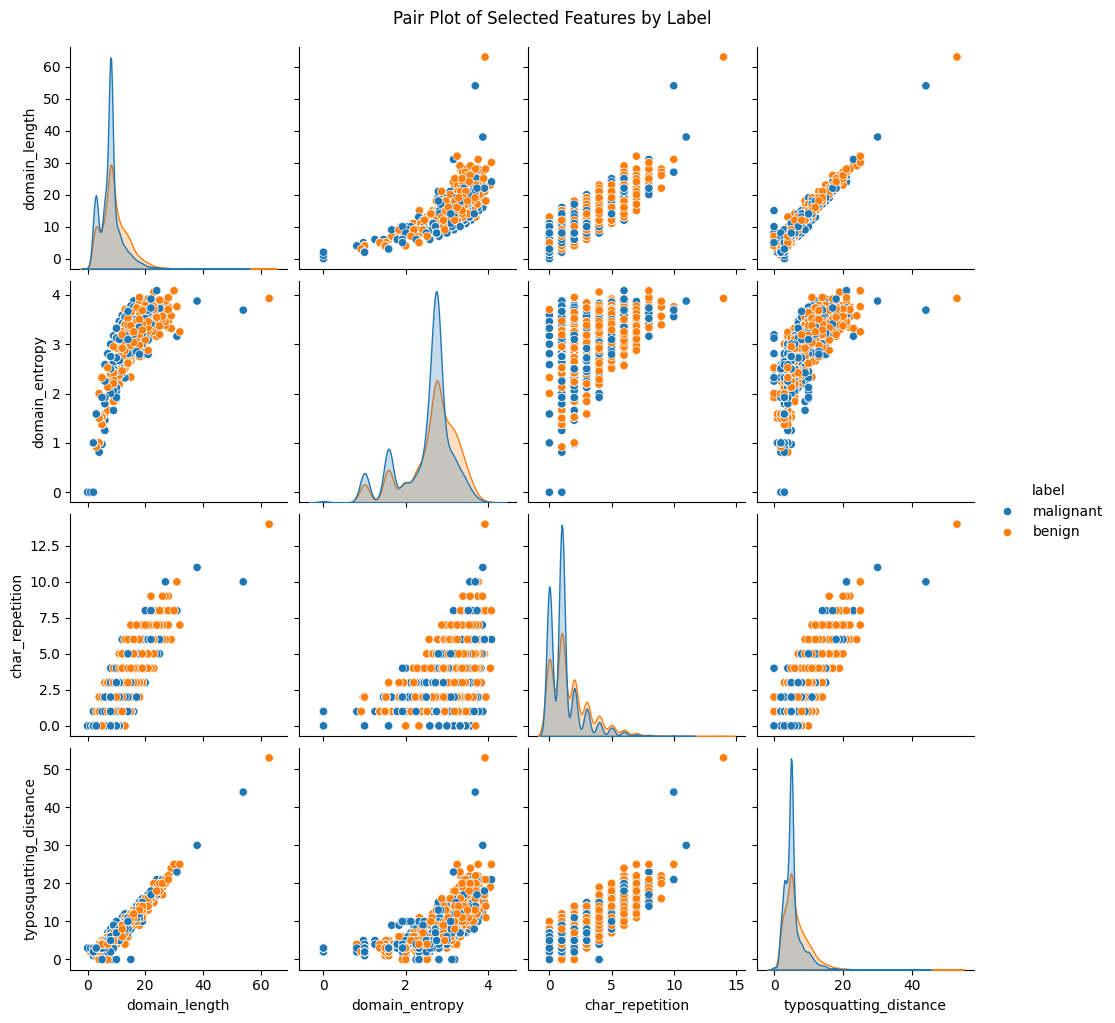

In [324]:
sns.pairplot(df_with_features, vars=["domain_length", "domain_entropy", "char_repetition", "typosquatting_distance"], hue="label")
plt.suptitle("Pair Plot of Selected Features by Label", y=1.02)
plt.show()


In [325]:
df_with_features.groupby('label')['domain_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4648.0,9.356282,4.759099,0.0,6.0,8.0,12.0,63.0
malignant,5352.0,7.873318,3.868037,0.0,6.0,8.0,9.0,54.0


In [326]:
df_with_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         10000 non-null  object 
 1   label                       10000 non-null  object 
 2   is_website_live             10000 non-null  bool   
 3   title                       10000 non-null  object 
 4   description                 10000 non-null  object 
 5   title_similarity_bin        10000 non-null  object 
 6   description_similarity_bin  10000 non-null  object 
 7   creation_date               3515 non-null   object 
 8   expiry_date                 3515 non-null   object 
 9   url_length                  10000 non-null  int64  
 10  num_subdirectories          10000 non-null  int64  
 11  num_query_params            10000 non-null  int64  
 12  has_ip_address              10000 non-null  bool   
 13  is_https                    1000

AGGREY

In [327]:
df_with_features['is_https'] = df_with_features['url'].apply(lambda url: 1 if str(url).startswith('http') else 0)
df_with_features['is_https'].head()

,is_https
0,1
1,1
2,1
3,1
4,1


In [328]:
https_counts = df_with_features['is_https'].value_counts()

https_counts


,count
is_https,
1,9994
0,6


In [330]:
df_with_features.columns

Index(['url', 'label', 'is_website_live', 'title', 'description',
       'title_similarity_bin', 'description_similarity_bin', 'creation_date',
       'expiry_date', 'url_length', 'num_subdirectories', 'num_query_params',
       'has_ip_address', 'is_https', 'has_www', 'num_subdomains',
       'domain_length', 'tld', 'total_links', 'external_links', 'path_length',
       'num_slashes', 'shortened_url', 'domain_entropy', 'has_hyphen',
       'char_repetition', 'common_phishing_words', 'typosquatting_distance',
       'contains_homograph_chars', 'has_brand_name_in_domain',
       'has_social_net', 'path_suspicious_keywords',
       'query_suspicious_keywords', 'has_redirect', 'url_is_random',
       'title_is_random', 'description_is_random'],
      dtype='object')

In [333]:
df_with_features.groupby('label')['path_suspicious_keywords'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4648.0,0.036790,0.191665,0.0,0.0,0.0,0.0,2.0
malignant,5352.0,0.005232,0.081856,0.0,0.0,0.0,0.0,2.0


In [334]:
df_with_features['path_suspicious_keywords'] = df_with_features['path_suspicious_keywords'].astype(int)

In [335]:
df_with_features['query_suspicious_keywords'] = df_with_features['query_suspicious_keywords'].astype(int)

In [336]:
malign_test_df.head()

,url,label
0,brielletlrapq.blogspot.mx,malignant
1,imgshost.pro,malignant
2,ipw.metadsp.co.uk,malignant
3,amvoyeur.blogspot.lt,malignant
4,edgecommunications.com,malignant


In [337]:
reference_urls = malign_test_df.sample(1000, random_state=123)['url'].tolist()

In [338]:
!pip install rapidfuzz

In [339]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from rapidfuzz import fuzz
from scipy.spatial.distance import cosine
from typing import List

def compute_url_similarity_batch(df: pd.DataFrame, url_column: str, ref_urls: List[str], batch_size: int = 1000, top_n: int = 5) -> pd.DataFrame:
    # Initialize vectorizer and fit on reference URLs
    vectorizer = TfidfVectorizer(ngram_range=(4, 16), analyzer="char_wb")
    ref_vectors = vectorizer.fit_transform(ref_urls)

    # Cluster the reference URL vectors to get center vectors for comparison
    n_clusters = min(50, len(ref_urls))  # Adjust to a maximum of 50 clusters or fewer if fewer reference URLs
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(ref_vectors)
    cluster_centers = kmeans.cluster_centers_

    similarity_scores = []

    # Process the main DataFrame in batches
    for start in range(0, len(df), batch_size):
        end = min(start + batch_size, len(df))
        print(f"Processing batch {start // batch_size + 1} ({start} to {end})")

        # Transform URLs in the current batch
        batch_urls = df[url_column][start:end]
        url_vectors = vectorizer.transform(batch_urls)

        # Calculate similarity scores for each URL vector in the batch
        for url_vec in url_vectors:
            url_vec_1d = url_vec.toarray().flatten()  # Convert to 1D array
            scores = [1 - cosine(url_vec_1d, center.flatten()) for center in cluster_centers]  # Ensure 1D arrays
            top_scores = sorted(scores, reverse=True)[:top_n]
            avg_top_score = np.mean(top_scores)
            similarity_scores.append(avg_top_score)

    # Append similarity scores to the DataFrame
    df['url_similarity_score'] = similarity_scores

    # Define thresholds for bins
    bins = [0, 0.25, 0.5, 0.75, 1.0]
    labels = ["Unlikely", "Less Likely", "Likely", "Very Likely"]
    df['similarity_bin'] = pd.cut(df['url_similarity_score'], bins=bins, labels=labels, include_lowest=True)



    return df




In [340]:


df_with_similarity = compute_url_similarity_batch(df_with_features, url_column='url', ref_urls=reference_urls, batch_size=400, top_n=2)

Processing batch 1 (0 to 400)
Processing batch 2 (400 to 800)
Processing batch 3 (800 to 1200)
Processing batch 4 (1200 to 1600)


/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


Processing batch 5 (1600 to 2000)
Processing batch 6 (2000 to 2400)
Processing batch 7 (2400 to 2800)
Processing batch 8 (2800 to 3200)
Processing batch 9 (3200 to 3600)
Processing batch 10 (3600 to 4000)
Processing batch 11 (4000 to 4400)
Processing batch 12 (4400 to 4800)
Processing batch 13 (4800 to 5200)
Processing batch 14 (5200 to 5600)
Processing batch 15 (5600 to 6000)
Processing batch 16 (6000 to 6400)
Processing batch 17 (6400 to 6800)
Processing batch 18 (6800 to 7200)
Processing batch 19 (7200 to 7600)
Processing batch 20 (7600 to 8000)
Processing batch 21 (8000 to 8400)
Processing batch 22 (8400 to 8800)
Processing batch 23 (8800 to 9200)
Processing batch 24 (9200 to 9600)
Processing batch 25 (9600 to 10000)


In [341]:
df_with_similarity.head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,...,has_brand_name_in_domain,has_social_net,path_suspicious_keywords,query_suspicious_keywords,has_redirect,url_is_random,title_is_random,description_is_random,url_similarity_score,similarity_bin
0,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,...,False,False,0,0,False,True,False,True,0.279899,Less Likely
1,http://freenudebabes.blogspot.com.tr,malignant,True,No Title,No Description,Not Similar,No Description,None,None,36,...,False,False,0,0,False,True,False,True,0.284072,Less Likely
2,http://amateursexporn.org,malignant,True,No Title,No Description,Not Similar,No Description,2008-08-05 01:03:06,2025-08-05 01:03:06,25,...,False,False,0,0,False,True,False,True,0.058116,Unlikely
3,http://www.tchprint.pl/,benign,True,No Title,No Description,Not Similar,No Description,None,None,23,...,False,False,0,0,False,True,False,True,0.020486,Unlikely
4,http://casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar,None,None,24,...,False,False,0,0,False,True,True,True,0.095083,Unlikely


In [342]:
df_with_similarity.groupby('label')['url_similarity_score'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4645.0,0.058665,0.041288,0.001326,0.030481,0.048076,0.072439,0.373369
malignant,5343.0,0.158740,0.107956,0.003979,0.069055,0.136166,0.236034,0.520087


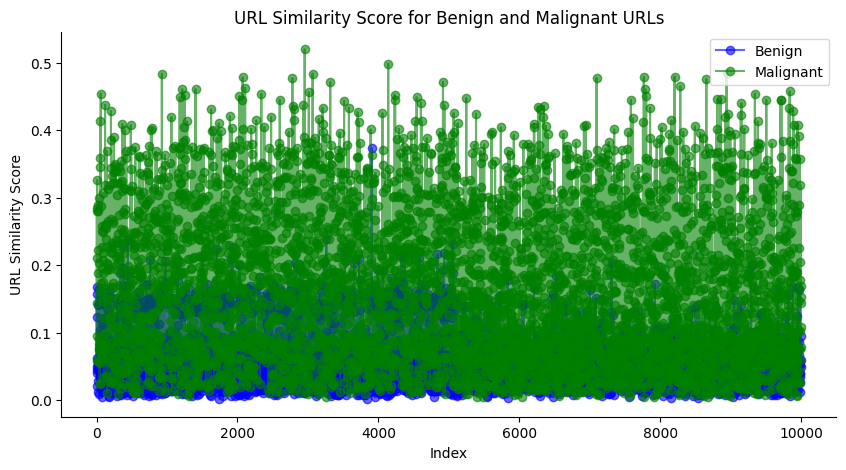

In [343]:
from matplotlib import pyplot as plt

# Separate the DataFrame into benign and malignant subsets
benign_urls_similar = df_with_similarity[df_with_similarity['label'] == 'benign']
malignant_urls_similar = df_with_similarity[df_with_similarity['label'] == 'malignant']

# Plot URL similarity scores for benign URLs
plt.figure(figsize=(10, 5))
plt.plot(benign_urls_similar.index, benign_urls_similar['url_similarity_score'], color='blue', label='Benign', linestyle='-', marker='o', alpha = 0.6)

# Plot URL similarity scores for malignant URLs
plt.plot(malignant_urls_similar.index, malignant_urls_similar['url_similarity_score'], color='green', label='Malignant', linestyle='-', marker='o',alpha=0.6)

# Customize the plot
plt.title('URL Similarity Score for Benign and Malignant URLs')
plt.xlabel('Index')
plt.ylabel('URL Similarity Score')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines
plt.show()


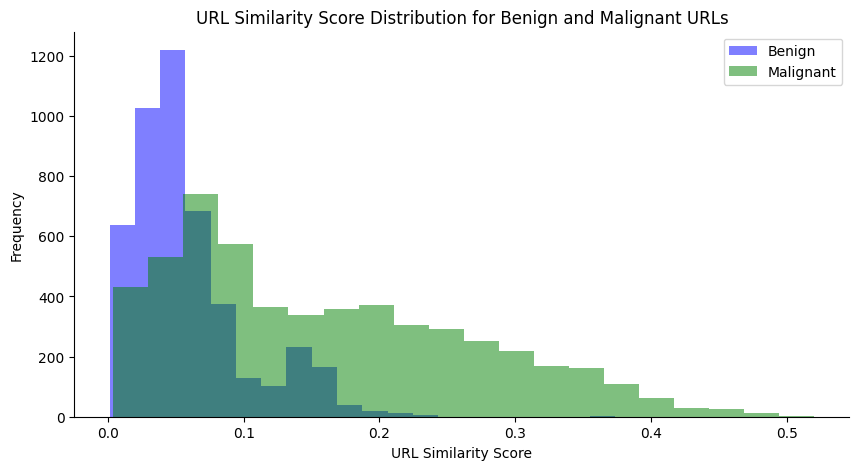

In [344]:


# Plot histogram for benign URLs
plt.figure(figsize=(10, 5))
plt.hist(benign_urls_similar['url_similarity_score'], bins=20, color='blue', alpha=0.5, label='Benign')

# Plot histogram for malignant URLs
plt.hist(malignant_urls_similar['url_similarity_score'], bins=20, color='green', alpha=0.5, label='Malignant')

# Customize the plot
plt.title('URL Similarity Score Distribution for Benign and Malignant URLs')
plt.xlabel('URL Similarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines
plt.show()


In [582]:
import re
from difflib import SequenceMatcher
import pandas as pd
from urllib.parse import urlparse

class URLProcessor:
    # Existing methods from your class...

    def calculate_domain_title_match_score(self, df: pd.DataFrame, url_column: str, title_column: str) -> pd.DataFrame:
        """
        Calculate a match score between the domain and title for each row in a DataFrame.
        Adds a new column 'domain_title_match_score' with the match score.

        Args:
        - df (pd.DataFrame): DataFrame containing the URLs and titles.
        - url_column (str): Column name in the DataFrame with the URLs.
        - title_column (str): Column name in the DataFrame with the titles.

        Returns:
        - pd.DataFrame: Updated DataFrame with an additional 'domain_title_match_score' column.
        """
        def calculate_score(url, title):
            try:
                # Extract the domain from the URL
                domain = urlparse(url).netloc.lower()

                # Convert title to lowercase for consistency
                title = title.lower()

                # Remove non-alphanumeric characters from domain and title for simpler matching
                domain_words = re.findall(r'\b\w+\b', domain)
                title_words = re.findall(r'\b\w+\b', title)

                # Calculate word overlap ratio
                common_words = set(domain_words) & set(title_words)
                word_overlap_score = len(common_words) / max(len(domain_words), len(title_words), 1)

                # Calculate string similarity using SequenceMatcher
                string_similarity_score = SequenceMatcher(None, domain, title).ratio()

                # Combine both scores into an overall match score
                match_score = 0.5 * word_overlap_score + 0.5 * string_similarity_score

                return match_score
            except Exception as e:
                print(f"Error calculating domain-title match score for URL '{url}' and title '{title}': {e}")
                return 0.0

        # Apply the calculation to each row in the DataFrame
        df["domain_title_match_score"] = df.apply(
            lambda row: calculate_score(row[url_column], row[title_column]), axis=1
        )

        return df




In [346]:

processor = URLProcessor()
df_with_scores = processor.calculate_domain_title_match_score(df_with_similarity, url_column="url", title_column="title")
df_with_scores[['url', 'title', 'domain_title_match_score']].head()

,url,title,domain_title_match_score
0,http://someyummystuff.tumblr.com,No Title,0.060606
1,http://freenudebabes.blogspot.com.tr,No Title,0.027027
2,http://amateursexporn.org,No Title,0.076923
3,http://www.tchprint.pl/,No Title,0.173913
4,http://casaindonesia.com,Daily Life - Home Ideas - Travel & Destination...,0.056338


In [545]:
df_with_similarity['creation_date'].head()

KeyError: 'creation_date'

In [347]:
df_with_scores.groupby('label')['domain_title_match_score'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4648.0,0.093768,0.072559,0.0,0.052632,0.083333,0.111111,1.0
malignant,5352.0,0.082108,0.057375,0.0,0.050000,0.075000,0.102564,1.0


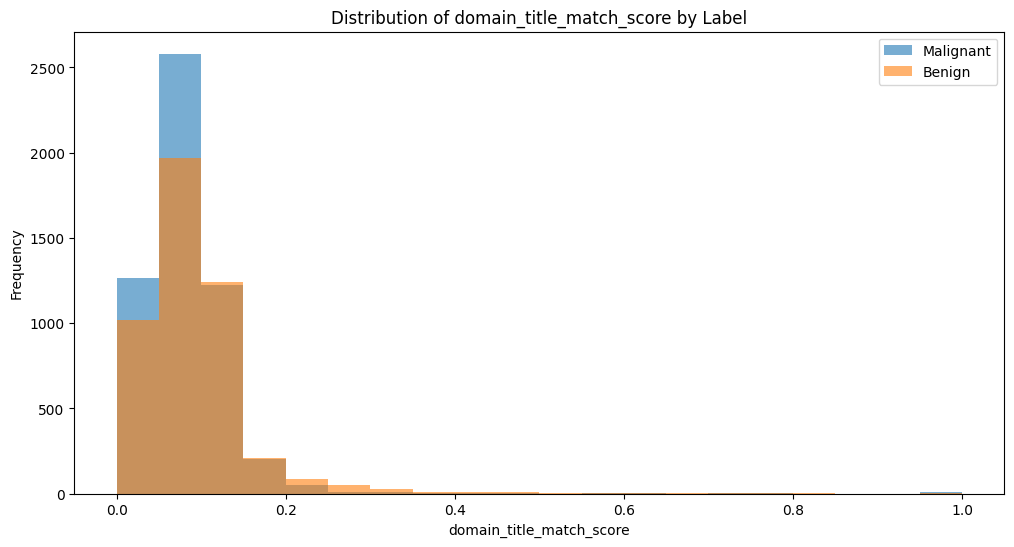

In [348]:
# Plot histogram for each label category
plt.figure(figsize=(12, 6))
df_with_features[df_with_features['label'] == 'malignant']['domain_title_match_score'].plot(kind='hist', bins=20, alpha=0.6, label='Malignant')
df_with_features[df_with_features['label'] == 'benign']['domain_title_match_score'].plot(kind='hist', bins=20, alpha=0.6, label='Benign')
plt.xlabel('domain_title_match_score')
plt.ylabel('Frequency')
plt.title('Distribution of domain_title_match_score by Label')
plt.legend()
plt.show()


In [583]:

from difflib import SequenceMatcher


class URLProcessor:
    # Existing methods from your class...

    def calculate_url_title_match_score(self, df: pd.DataFrame, url_column: str, title_column: str) -> pd.DataFrame:
        """
        Calculate a match score between the full URL and the title for each row in a DataFrame.
        Adds a new column 'url_title_match_score' with the match score.

        Args:
        - df (pd.DataFrame): DataFrame containing the URLs and titles.
        - url_column (str): Column name in the DataFrame with the URLs.
        - title_column (str): Column name in the DataFrame with the titles.

        Returns:
        - pd.DataFrame: Updated DataFrame with an additional 'url_title_match_score' column.
        """
        def calculate_score(url, title):
            try:
                # Convert URL and title to lowercase for consistency
                url = url.lower()
                title = title.lower()

                # Remove non-alphanumeric characters for simpler matching
                url_words = re.findall(r'\b\w+\b', url)
                title_words = re.findall(r'\b\w+\b', title)

                # Calculate word overlap ratio
                common_words = set(url_words) & set(title_words)
                word_overlap_score = len(common_words) / max(len(url_words), len(title_words), 1)

                # Calculate string similarity using SequenceMatcher
                string_similarity_score = SequenceMatcher(None, url, title).ratio()

                # Combine both scores into an overall match score
                match_score = 0.5 * word_overlap_score + 0.5 * string_similarity_score

                return match_score
            except Exception as e:
                print(f"Error calculating URL-title match score for URL '{url}' and title '{title}': {e}")
                return 0.0

        # Apply the calculation to each row in the DataFrame
        df["url_title_match_score"] = df.apply(
            lambda row: calculate_score(row[url_column], row[title_column]), axis=1
        )

        return df



In [422]:
processor = URLProcessor()

df_with_scores = processor.calculate_url_title_match_score(df_with_scores, url_column="url", title_column="title")
df_with_scores[['url', 'title', 'url_title_match_score']].head()


,url,title,url_title_match_score
0,http://someyummystuff.tumblr.com,No Title,0.075000
1,http://freenudebabes.blogspot.com.tr,No Title,0.068182
2,http://amateursexporn.org,No Title,0.090909
3,http://www.tchprint.pl/,No Title,0.096774
4,http://casaindonesia.com,Daily Life - Home Ideas - Travel & Destination...,0.089744


In [423]:
df_with_scores.groupby('label')['url_title_match_score'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4645.0,0.074444,0.082218,0.0,0.042254,0.054545,0.071429,0.660714
malignant,5343.0,0.088281,0.042019,0.0,0.071429,0.083333,0.100000,0.844444


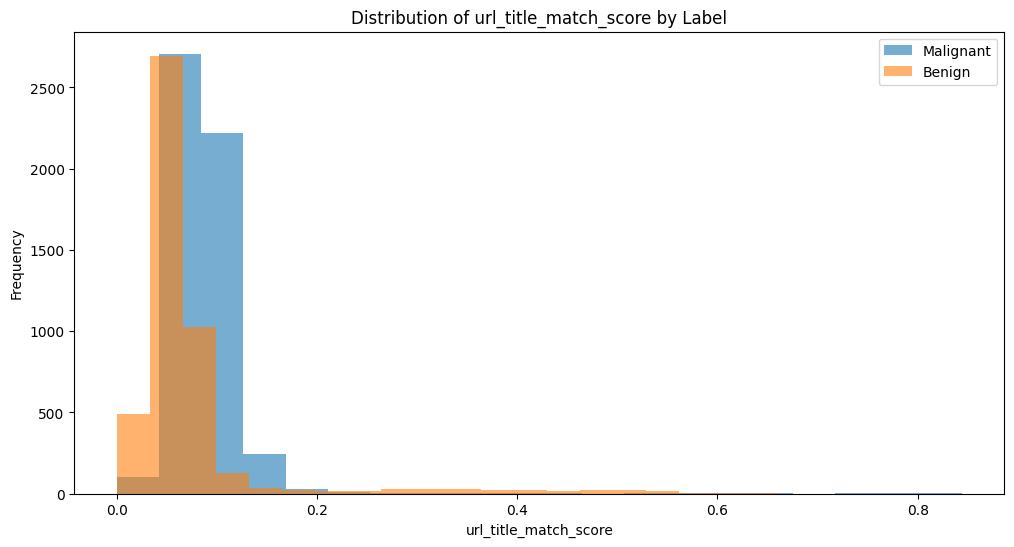

In [424]:
# Plot histogram for each label category
plt.figure(figsize=(12, 6))
df_with_scores[df_with_features['label'] == 'malignant']['url_title_match_score'].plot(kind='hist', bins=20, alpha=0.6, label='Malignant')
df_with_scores[df_with_features['label'] == 'benign']['url_title_match_score'].plot(kind='hist', bins=20, alpha=0.6, label='Benign')
plt.xlabel('url_title_match_score')
plt.ylabel('Frequency')
plt.title('Distribution of url_title_match_score by Label')
plt.legend()
plt.show()


In [584]:
class URLProcessor:
    # Existing methods from your class...

    def calculate_digit_ratio_in_url(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """
        Calculate the ratio of digits to the total number of characters in a URL for each row in a DataFrame.
        Adds a new column 'digit_ratio_in_url' with the digit ratio.

        Args:
        - df (pd.DataFrame): DataFrame containing the URLs.
        - url_column (str): Column name in the DataFrame with the URLs.

        Returns:
        - pd.DataFrame: Updated DataFrame with an additional 'digit_ratio_in_url' column.
        """
        def calculate_ratio(url):
            try:
                # Remove non-alphanumeric characters from the URL for consistency
                alphanumeric_url = re.sub(r'\W', '', url)

                # Count digits and calculate the ratio
                digit_count = sum(char.isdigit() for char in alphanumeric_url)
                total_length = len(alphanumeric_url)

                # Avoid division by zero
                if total_length == 0:
                    return 0.0

                # Calculate and return the digit ratio
                return digit_count / total_length
            except Exception as e:
                print(f"Error calculating digit ratio for URL '{url}': {e}")
                return 0.0

        # Apply the calculation to each row in the DataFrame
        df["digit_ratio_in_url"] = df[url_column].apply(calculate_ratio)

        return df



In [426]:

processor = URLProcessor()

df_with_digit_ratio = processor.calculate_digit_ratio_in_url(df_with_scores, url_column="url")
df_with_digit_ratio[['url', 'digit_ratio_in_url']].head()


,url,digit_ratio_in_url
0,http://someyummystuff.tumblr.com,0.0
1,http://freenudebabes.blogspot.com.tr,0.0
2,http://amateursexporn.org,0.0
3,http://www.tchprint.pl/,0.0
4,http://casaindonesia.com,0.0


In [427]:
df_with_digit_ratio.groupby('label')['digit_ratio_in_url'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4645.0,0.110848,0.109052,0.0,0.0,0.094118,0.162393,0.672727
malignant,5343.0,0.034913,0.079421,0.0,0.0,0.000000,0.032258,1.000000


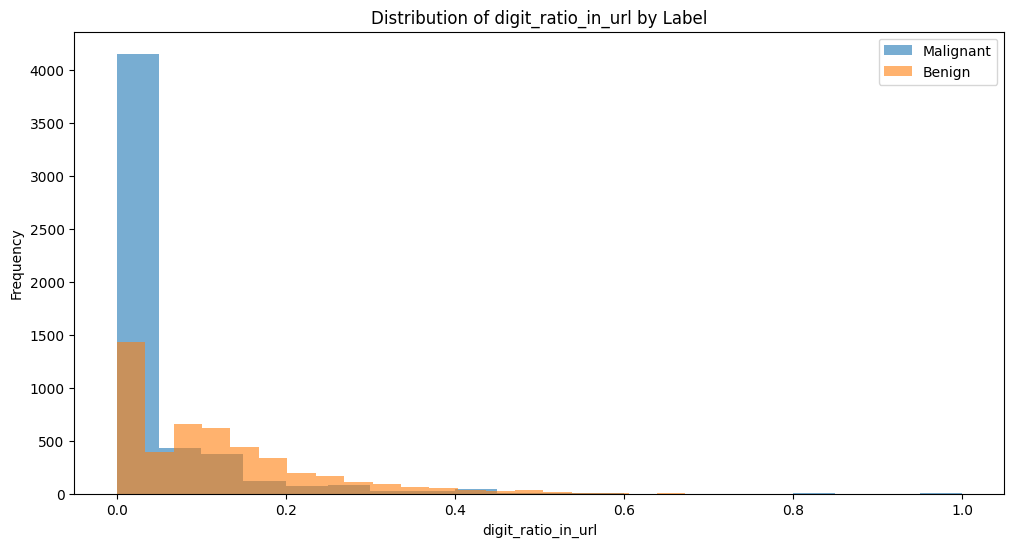

In [428]:


# Plot histogram for each label category
plt.figure(figsize=(12, 6))
df_with_digit_ratio[df_with_digit_ratio['label'] == 'malignant']['digit_ratio_in_url'].plot(kind='hist', bins=20, alpha=0.6, label='Malignant')
df_with_digit_ratio[df_with_digit_ratio['label'] == 'benign']['digit_ratio_in_url'].plot(kind='hist', bins=20, alpha=0.6, label='Benign')
plt.xlabel('digit_ratio_in_url')
plt.ylabel('Frequency')
plt.title('Distribution of digit_ratio_in_url by Label')
plt.legend()
plt.show()


In [585]:
import pandas as pd
from datetime import datetime

class URLProcessor:
    def compute_domain_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """Adds domain-related features to the DataFrame based on existing creation and expiry dates."""

        # Convert 'creation_date' and 'expiry_date' to datetime format, handling errors
        df['creation_date'] = pd.to_datetime(df['creation_date'], errors='coerce')
        df['expiry_date'] = pd.to_datetime(df['expiry_date'], errors='coerce')

        # Current date for calculations
        current_date = datetime.now()

        # Calculate domain age in years from the creation_date
        df['domain_age'] = df['creation_date'].apply(
            lambda x: (current_date - x).days // 365 if pd.notnull(x) else 0
        )

        # Calculate days to expiry from the expiry_date
        df['days_to_expiry'] = df['expiry_date'].apply(
            lambda x: (x - current_date).days if pd.notnull(x) else 0
        )

        # Flag expired domains
        df['is_expired'] = df['expiry_date'].apply(
            lambda x: x < current_date if pd.notnull(x) else False
        )

        # Calculate registration duration in years (from creation_date to expiry_date)
        df['registration_duration'] = df.apply(
            lambda row: (row['expiry_date'] - row['creation_date']).days // 365
            if pd.notnull(row['expiry_date']) and pd.notnull(row['creation_date']) else 0, axis=1
        )

        # Classify as "short-term" if registration duration is less than 2 years, otherwise "long-term"
        df['registration_type'] = df['registration_duration'].apply(
            lambda x: 'short-term' if x and x < 2 else 'long-term' if x else 'unknown'
        )

        # Define expiration risk as "high" if expired or expiring within 30 days
        df['expiration_risk'] = df['days_to_expiry'].apply(
            lambda x: 'high' if x <= 30 and x > 0 else 'low' if x > 30 else 'unknown'
        )

        # Fill missing values with appropriate fillers
        df['domain_age'].fillna(0, inplace=True)
        df['days_to_expiry'].fillna(0, inplace=True)
        df['registration_duration'].fillna(0, inplace=True)
        df['registration_type'].fillna('unknown', inplace=True)
        df['expiration_risk'].fillna('unknown', inplace=True)

        return df


In [470]:

# Initialize URLProcessor and compute domain features
url_processor = URLProcessor()
df_with_domain_age = url_processor.compute_domain_features(df_with_digit_ratio)

# Display the resulting DataFrame
df_with_domain_age[['url', 'creation_date', 'expiry_date', 'domain_age', 'days_to_expiry', 'is_expired', 'registration_duration', 'registration_type', 'expiration_risk']].head()

<ipython-input-469-dc80c3206ae9>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['domain_age'].fillna(0, inplace=True)
<ipython-input-469-dc80c3206ae9>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,url,creation_date,expiry_date,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
0,http://someyummystuff.tumblr.com,2006-06-08 22:11:40,2025-06-08 22:11:40,18,208,False,19,long-term,low
1,http://freenudebabes.blogspot.com.tr,NaT,NaT,0,0,False,0,unknown,unknown
2,http://amateursexporn.org,NaT,NaT,0,0,False,0,unknown,unknown
3,http://www.tchprint.pl/,NaT,NaT,0,0,False,0,unknown,unknown
4,http://casaindonesia.com,NaT,NaT,0,0,False,0,unknown,unknown


In [474]:
# Extract the domain from the URL if it was removed earlier
df_with_domain_age['domain'] = df_with_domain_age['url'].apply(lambda x: urlparse(x).netloc.split('.')[-1] if len(urlparse(x).netloc.split('.')) > 1 else urlparse(x).netloc)

In [586]:
from urllib.parse import urlparse

class URLProcessor:
    # Existing methods from your class...

    def extract_domain(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """
        Extracts the main domain from URLs and adds it as a new column 'domain' in the DataFrame.

        Args:
        - df (pd.DataFrame): DataFrame containing the URLs.
        - url_column (str): Column name in the DataFrame with the URLs.

        Returns:
        - pd.DataFrame: Updated DataFrame with an additional 'domain' column.
        """
        def get_domain(url):
            try:
                netloc_parts = urlparse(url).netloc.split('.')
                return netloc_parts[-1] if len(netloc_parts) > 1 else netloc_parts[0]
            except Exception as e:
                print(f"Error extracting domain from URL '{url}': {e}")
                return None

        # Apply the domain extraction to each row in the DataFrame
        df["domain"] = df[url_column].apply(get_domain)

        return df


In [574]:
processor = URLProcessor()
df_with_domain_age = processor.extract_domain(df_with_domain_age, url_column="url")

In [556]:
df_with_domain_age.head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,url_length,num_subdirectories,num_query_params,...,domain,domain_title_match_score,url_title_match_score,digit_ratio_in_url,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
0,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,32,0,0,...,com,0.060606,0.075000,0.0,18,208,False,19,long-term,low
1,http://freenudebabes.blogspot.com.tr,malignant,True,No Title,No Description,Not Similar,No Description,36,0,0,...,tr,0.027027,0.068182,0.0,0,0,False,0,unknown,unknown
2,http://amateursexporn.org,malignant,True,No Title,No Description,Not Similar,No Description,25,0,0,...,org,0.076923,0.090909,0.0,0,0,False,0,unknown,unknown
3,http://www.tchprint.pl/,benign,True,No Title,No Description,Not Similar,No Description,23,1,0,...,pl,0.173913,0.096774,0.0,0,0,False,0,unknown,unknown
4,http://casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar,24,0,0,...,com,0.056338,0.089744,0.0,0,0,False,0,unknown,unknown


In [476]:
df_with_domain_age.to_csv('df_with_domain_age.csv', index=False)

In [477]:
df_with_domain_age = pd.read_csv('df_with_domain_age.csv')

##delete after getting domain age

In [479]:
df_with_domain_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         10000 non-null  object 
 1   label                       10000 non-null  object 
 2   is_website_live             10000 non-null  bool   
 3   title                       9999 non-null   object 
 4   description                 9946 non-null   object 
 5   title_similarity_bin        10000 non-null  object 
 6   description_similarity_bin  10000 non-null  object 
 7   creation_date               479 non-null    object 
 8   expiry_date                 447 non-null    object 
 9   url_length                  10000 non-null  int64  
 10  num_subdirectories          10000 non-null  int64  
 11  num_query_params            10000 non-null  int64  
 12  has_ip_address              10000 non-null  bool   
 13  is_https                    1000

In [484]:
df_with_domain_age.drop(columns=['creation_date','expiry_date'], inplace = True)

In [587]:
class URLProcessor:
    # Existing methods from your class...

    def classify_features(self, df: pd.DataFrame, low_cardinality_threshold: int = 7) -> dict:
        """
        Classifies DataFrame features into boolean, low-cardinality categorical,
        high-cardinality categorical, and numeric features for encoding.

        Args:
        - df (pd.DataFrame): DataFrame to classify features.
        - low_cardinality_threshold (int): Threshold for determining low cardinality categorical features.

        Returns:
        - dict: A dictionary with lists of column names for each feature type.
        """
        # Initialize lists to hold feature classifications
        boolean_features = []
        low_cardinality_categorical_features = []
        high_cardinality_categorical_features = []
        numeric_features = []

        for col in df.columns:
            unique_values = df[col].nunique()
            dtype = df[col].dtype

            if dtype == 'bool':
                boolean_features.append(col)

            elif dtype in ['object', 'category']:
                if unique_values <= low_cardinality_threshold:
                    low_cardinality_categorical_features.append(col)
                else:
                    high_cardinality_categorical_features.append(col)

            elif dtype in ['int64', 'float64', 'int']:
                numeric_features.append(col)

        return {
            "boolean_features": boolean_features,
            "low_cardinality_categorical_features": low_cardinality_categorical_features,
            "high_cardinality_categorical_features": high_cardinality_categorical_features,
            "numeric_features": numeric_features
        }


In [558]:
processor = URLProcessor()
feature_classes = processor.classify_features(df_with_domain_age.drop(columns=['label']))

# Display the classifications
for key, features in feature_classes.items():
    print(f"{key}: {features}")

boolean_features: ['is_website_live', 'has_ip_address', 'has_www', 'shortened_url', 'has_hyphen', 'contains_homograph_chars', 'has_brand_name_in_domain', 'has_social_net', 'has_redirect', 'url_is_random', 'title_is_random', 'description_is_random', 'is_expired']
low_cardinality_categorical_features: ['title_similarity_bin', 'description_similarity_bin', 'similarity_bin', 'registration_type', 'expiration_risk']
high_cardinality_categorical_features: ['url', 'title', 'description', 'tld', 'domain']
numeric_features: ['url_length', 'num_subdirectories', 'num_query_params', 'is_https', 'num_subdomains', 'domain_length', 'total_links', 'external_links', 'path_length', 'num_slashes', 'domain_entropy', 'char_repetition', 'common_phishing_words', 'typosquatting_distance', 'path_suspicious_keywords', 'query_suspicious_keywords', 'url_similarity_score', 'domain_title_match_score', 'url_title_match_score', 'digit_ratio_in_url', 'domain_age', 'days_to_expiry', 'registration_duration']


In [486]:
for col in df_with_domain_age.columns:
    print(f"{col}: {df_with_domain_age[col].dtype}")

url: object
label: object
is_website_live: bool
title: object
description: object
title_similarity_bin: object
description_similarity_bin: object
url_length: int64
num_subdirectories: int64
num_query_params: int64
has_ip_address: bool
is_https: int64
has_www: bool
num_subdomains: int64
domain_length: int64
tld: object
total_links: int64
external_links: int64
path_length: int64
num_slashes: int64
shortened_url: bool
domain_entropy: float64
has_hyphen: bool
char_repetition: int64
common_phishing_words: int64
typosquatting_distance: int64
contains_homograph_chars: bool
has_brand_name_in_domain: bool
has_social_net: bool
path_suspicious_keywords: int64
query_suspicious_keywords: int64
has_redirect: bool
url_is_random: bool
title_is_random: bool
description_is_random: bool
url_similarity_score: float64
similarity_bin: object
domain: object
domain_title_match_score: float64
url_title_match_score: float64
digit_ratio_in_url: float64
domain_age: int64
days_to_expiry: int64
is_expired: bool
reg

In [487]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate columns by data types
numeric_columns = df_with_domain_age.select_dtypes(include=['float64', 'int64']).columns
boolean_columns = df_with_domain_age.select_dtypes(include=['bool']).columns
categorical_columns = df_with_domain_age.select_dtypes(include=['object', 'category']).columns

# Plot numeric columns as histograms
plt.figure(figsize=(12, 6))
df_with_domain_age[numeric_columns].hist(bins=15, figsize=(18, 12))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Plot boolean columns as count plots
plt.figure(figsize=(12, len(boolean_columns) * 2))
for i, col in enumerate(boolean_columns, 1):
    plt.subplot(len(boolean_columns), 1, i)
    sns.countplot(data=df_with_domain_age, x=col)
    plt.title(f"Count Plot of {col}")
    plt.tight_layout()

plt.suptitle("Count Plots of Boolean Features")
plt.subplots_adjust(top=0.9)
plt.show()

# Plot categorical columns as bar plots for the top categories
plt.figure(figsize=(12, len(categorical_columns) * 3))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    df_with_domain_age[col][:10].value_counts().plot(kind='bar')
    plt.title(f"Categories in {col}")
    plt.tight_layout()

plt.suptitle("Bar Plots of Categorical Features (Top 10 Categories)")
plt.subplots_adjust(top=0.9)
plt.show()


<Figure size 1200x600 with 0 Axes>

KeyboardInterrupt: 

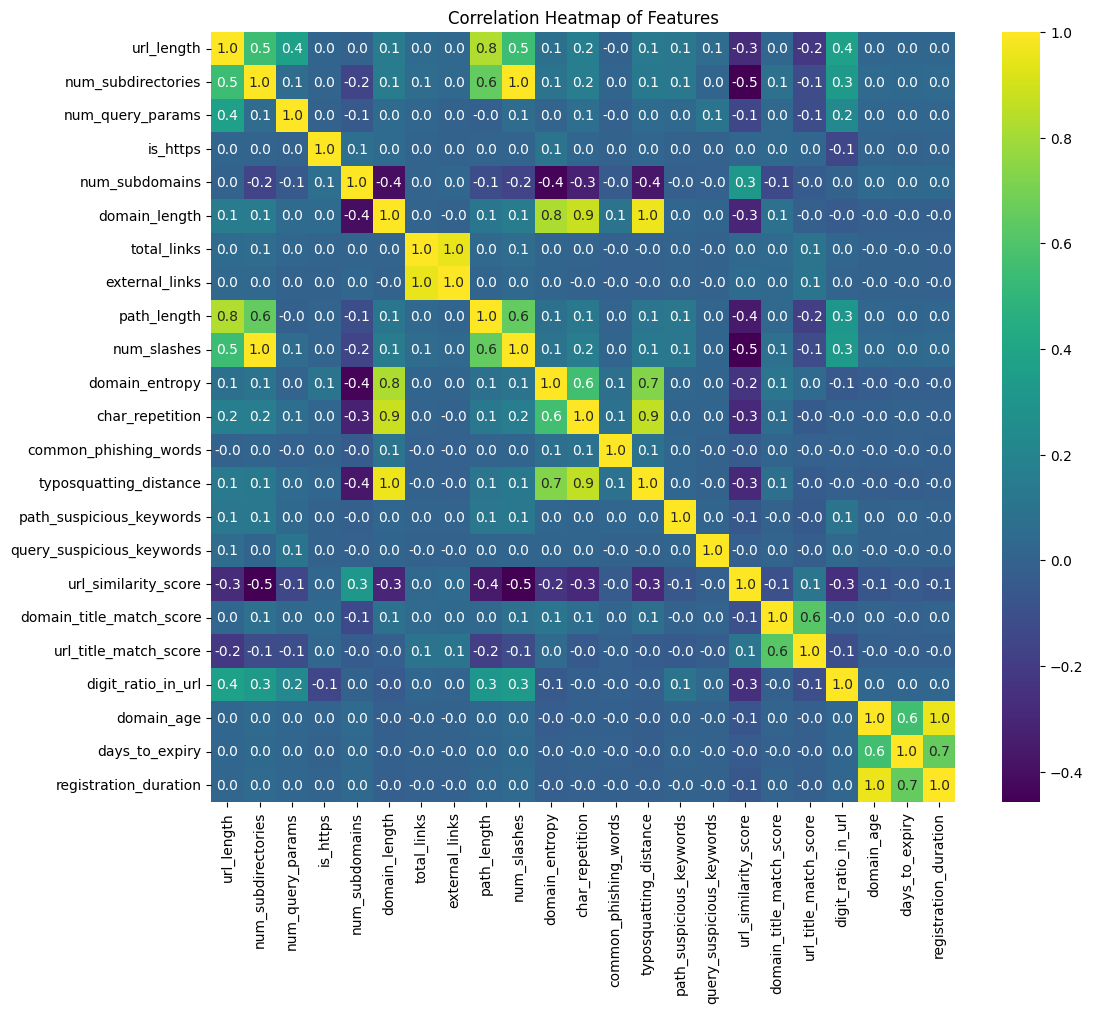

In [488]:

plt.figure(figsize=(12, 10))
sns.heatmap(df_with_domain_age[numeric_features].corr(), annot=True, cmap='viridis', fmt=".1f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [489]:
!pip install --upgrade category_encoders

In [490]:
df_with_domain_age.isna().sum()

,0
url,0
label,0
is_website_live,0
title,1
description,54
title_similarity_bin,0
description_similarity_bin,0
url_length,0
num_subdirectories,0
num_query_params,0


In [491]:
df_with_domain_age.dropna(inplace=True)

In [492]:
df_with_domain_age.isna().sum().sum()

0

In [493]:
df_with_domain_age.duplicated().sum()

0

In [438]:
!pip install category_encoders

In [494]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder  # For binary encoding of booleans


In [495]:
X = df_with_domain_age.drop(columns=['label'])
y = df_with_domain_age['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [597]:
df_with_domain_age.to_csv('df_with_domain_age.csv', index=False)

In [399]:
X_train.head()

,url,is_website_live,title,description,title_similarity_bin,description_similarity_bin,url_length,num_subdirectories,num_query_params,has_ip_address,...,similarity_bin,domain_title_match_score,url_title_match_score,digit_ratio_in_url,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
9222,http://seximages4u.blogspot.hr,False,No Title,No Description,Not Similar,No Description,30,0,0,False,...,Unlikely,0.032258,0.078947,0.040000,0,0,False,0,unknown,unknown
3948,http://canzzhue.blogspot.com/2013/01/kenapa-pe...,True,No Title,No Description,Not Similar,No Description,79,3,0,False,...,Unlikely,0.068966,0.034483,0.090909,0,0,False,0,unknown,unknown
4920,http://cubestage.pl/albumy/1483-various-artist...,True,No Title,No Description,Not Similar,No Description,85,2,0,False,...,Unlikely,0.050000,0.064516,0.228571,0,0,False,0,unknown,unknown
5192,http://1horseproperty.com/equestrianrealestate...,False,No Title,No Description,Not Similar,No Description,66,2,2,False,...,Unlikely,0.076923,0.054054,0.090909,0,0,False,0,unknown,unknown
63,http://papadragonstg.blogspot.am,True,No Title,No Description,Not Similar,No Description,32,0,0,False,...,Less Likely,0.090909,0.075000,0.000000,0,0,False,0,unknown,unknown


In [496]:
X_test.head()

,url,is_website_live,title,description,title_similarity_bin,description_similarity_bin,url_length,num_subdirectories,num_query_params,has_ip_address,...,domain,domain_title_match_score,url_title_match_score,digit_ratio_in_url,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
2722,http://jackosman2.blogspot.ro,True,No Title,No Description,Not Similar,No Description,29,0,0,False,...,ro,0.066667,0.081081,0.041667,0,0,False,0,unknown,unknown
4557,http://canon-europe.com,True,No Title,No Description,Not Similar,No Description,23,0,0,False,...,com,0.125000,0.096774,0.000000,0,0,False,0,unknown,unknown
7198,http://en.wikipedia.org/wiki/mc_hammer_discogr...,False,No Title,No Description,Not Similar,No Description,50,2,0,False,...,org,0.041667,0.051724,0.000000,0,0,False,0,unknown,unknown
4366,http://www.google.cn,True,No Title,No Description,Not Similar,No Description,20,0,0,False,...,cn,0.142857,0.142857,0.000000,0,0,False,0,unknown,unknown
3166,http://celebrityhotbikinis.blogspot.com.br,True,No Title,No Description,Not Similar,No Description,42,0,0,False,...,br,0.046512,0.080000,0.000000,19,387,False,21,long-term,low


In [497]:
y# Mapping the categorical labels to numeric values
y_train_encoded = y_train.map({'benign': 0, 'malignant': 1}).astype(int)
y_test_encoded = y_test.map({'benign': 0, 'malignant': 1}).astype(int)

# Verify the res
y_train_encoded.head()


,label
3619,1
8800,0
6573,1
9045,1
6816,0


In [498]:
y_test_encoded.head()

,label
2722,1
4557,1
7198,1
4366,1
3166,1


In [499]:
boolean_features

['is_website_live',
 'has_ip_address',
 'has_www',
 'shortened_url',
 'has_hyphen',
 'contains_homograph_chars',
 'has_brand_name_in_domain',
 'has_social_net',
 'has_redirect',
 'url_is_random',
 'title_is_random',
 'description_is_random',
 'is_expired']

In [500]:
high_cardinality_categorical_features

['url', 'title', 'description', 'tld', 'domain']

In [501]:
low_cardinality_categorical_features

['title_similarity_bin',
 'description_similarity_bin',
 'similarity_bin',
 'registration_type',
 'expiration_risk']

In [502]:
numeric_features

['url_length',
 'num_subdirectories',
 'num_query_params',
 'is_https',
 'num_subdomains',
 'domain_length',
 'total_links',
 'external_links',
 'path_length',
 'num_slashes',
 'domain_entropy',
 'char_repetition',
 'common_phishing_words',
 'typosquatting_distance',
 'path_suspicious_keywords',
 'query_suspicious_keywords',
 'url_similarity_score',
 'domain_title_match_score',
 'url_title_match_score',
 'digit_ratio_in_url',
 'domain_age',
 'days_to_expiry',
 'registration_duration']

In [507]:
X_train['registration_type'].head()

,registration_type
3619,unknown
8800,unknown
6573,long-term
9045,unknown
6816,unknown


In [508]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
import pandas as pd

class PreprocessingPipeline:
    # Define feature groups as class-level attributes
    boolean_features = [
        'is_website_live','has_ip_address','shortened_url',
        'has_hyphen','contains_homograph_chars','has_brand_name_in_domain',
        'has_social_net', 'has_redirect','url_is_random','title_is_random',
        'description_is_random','is_expired'
        ]

    low_cardinality_categorical_features = [
        'title_similarity_bin', 'description_similarity_bin','similarity_bin','registration_type',
        'expiration_risk'
    ]

    high_cardinality_categorical_features = [
        'url', 'title', 'description', 'tld', 'domain'
    ]

    numeric_features = [
        'url_length','num_subdirectories', 'num_query_params', 'is_https',
        'num_subdomains','domain_length','total_links','external_links',
        'path_length','num_slashes','domain_entropy','char_repetition','common_phishing_words',
        'typosquatting_distance','path_suspicious_keywords','query_suspicious_keywords',
        'url_similarity_score','domain_title_match_score','url_title_match_score',
        'digit_ratio_in_url','domain_age','days_to_expiry','registration_duration'
    ]

    def __init__(self, target_column):
        self.target_column = target_column
        self.pipeline = self._build_pipeline()

    def _build_pipeline(self):
        # Define the transformations for each feature group
        preprocessing_pipeline = ColumnTransformer(
            transformers=[
                ('target_enc', TargetEncoder(), self.high_cardinality_categorical_features),  # High cardinality encoding
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), self.low_cardinality_categorical_features),  # One-hot for low cardinality
                ('scaler', StandardScaler(), self.numeric_features)  # Scale numeric features
            ], remainder='passthrough'  # Keep the rest of the columns as-is (like boolean features)
        )

        return Pipeline(steps=[('preprocessor', preprocessing_pipeline)])

    def fit_transform(self, X_train: pd.DataFrame, y_train: pd.Series) -> pd.DataFrame:
        """
        Fits the preprocessing pipeline on the training data and transforms it.

        Args:
        - X_train (pd.DataFrame): Training feature set.
        - y_train (pd.Series): Target values for the training set.

        Returns:
        - pd.DataFrame: Transformed training data.
        """
        transformed_data = self.pipeline.fit_transform(X_train, y_train)
        return pd.DataFrame(transformed_data, columns=self._get_feature_names())

    def transform(self, X_test: pd.DataFrame) -> pd.DataFrame:
        """
        Transforms the test data using the fitted pipeline.

        Args:
        - X_test (pd.DataFrame): Test feature set.

        Returns:
        - pd.DataFrame: Transformed test data.
        """
        transformed_data = self.pipeline.transform(X_test)
        return pd.DataFrame(transformed_data, columns=self._get_feature_names())

    def _get_feature_names(self) -> list:
        """
        Retrieves the names of the features after transformations.

        Returns:
        - list: List of feature names after transformations.
        """
        # Get feature names after the transformations in ColumnTransformer
        transformed_feature_names = self.pipeline.named_steps['preprocessor'].get_feature_names_out()
        return transformed_feature_names.tolist()


In [509]:
# Initialize and apply preprocessing pipeline
preprocessor = PreprocessingPipeline(target_column='label')
X_train_processed = preprocessor.fit_transform(X_train, y_train_encoded)
X_test_processed = preprocessor.transform(X_test)


In [510]:
X_train_processed.head()

,target_enc__url,target_enc__title,target_enc__description,target_enc__tld,target_enc__domain,onehot__title_similarity_bin_Moderately Similar,onehot__title_similarity_bin_Not Similar,onehot__title_similarity_bin_Slightly Similar,onehot__description_similarity_bin_No Description,onehot__description_similarity_bin_Not Similar,...,remainder__shortened_url,remainder__has_hyphen,remainder__contains_homograph_chars,remainder__has_brand_name_in_domain,remainder__has_social_net,remainder__has_redirect,remainder__url_is_random,remainder__title_is_random,remainder__description_is_random,remainder__is_expired
0,0.596377,0.552328,0.549766,0.633210,0.633210,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.466269,0.552328,0.549766,0.459975,0.459975,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.596377,0.552328,0.549766,0.373798,0.373798,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.596377,0.552328,0.549766,0.298702,0.298702,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.466269,0.552328,0.549766,0.442488,0.442488,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [511]:
X_test_processed.head()

,target_enc__url,target_enc__title,target_enc__description,target_enc__tld,target_enc__domain,onehot__title_similarity_bin_Moderately Similar,onehot__title_similarity_bin_Not Similar,onehot__title_similarity_bin_Slightly Similar,onehot__description_similarity_bin_No Description,onehot__description_similarity_bin_Not Similar,...,remainder__shortened_url,remainder__has_hyphen,remainder__contains_homograph_chars,remainder__has_brand_name_in_domain,remainder__has_social_net,remainder__has_redirect,remainder__url_is_random,remainder__title_is_random,remainder__description_is_random,remainder__is_expired
0,0.536008,0.552328,0.549766,0.617901,0.617901,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.536008,0.552328,0.549766,0.442488,0.442488,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.536008,0.552328,0.549766,0.405128,0.405128,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.536008,0.552328,0.549766,0.347028,0.347028,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.536008,0.552328,0.549766,0.577914,0.577914,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [512]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(y_train.shape)
print(y_test.shape)

(5957, 53)
(3972, 53)
(5957,)
(3972,)


In [513]:
!pip install joblib

In [514]:
import joblib
model_columns = X_train_processed.columns  # Capture the column names
joblib.dump(model_columns, 'model_columns.joblib')

['model_columns.joblib']

In [515]:
import pandas as pd
from urllib.parse import urlparse, parse_qs
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score, classification_report
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [516]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train_encoded)

y_pred_baseline = dummy_clf.predict(X_test)

accuracy_baseline = accuracy_score(y_test_encoded, y_pred_baseline)
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")

# Generate the classification report
print("\nBaseline Model Classification Report:")
print(classification_report(y_test_encoded, y_pred_baseline, zero_division = 0));



Baseline Model Accuracy: 0.5383

Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1834
           1       0.54      1.00      0.70      2138

    accuracy                           0.54      3972
   macro avg       0.27      0.50      0.35      3972
weighted avg       0.29      0.54      0.38      3972



In [517]:
def create_model_pipeline(model):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    return pipeline

models = {
    "Dummy Classifier": DummyClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(),
    "simple perceptron":Perceptron(max_iter=1000, tol=1e-3, random_state=42)

}



for model_name, model in models.items():
    print(f"Training {model_name} model...")

    pipeline = create_model_pipeline(model)
    pipeline.fit(X_train_processed, y_train_encoded)
    y_pred = pipeline.predict(X_test_processed)

    weighted_f1 = f1_score(y_test_encoded, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred, adjusted=False)

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred,zero_division=0)

    print(f"{model_name} Model Weighted F1 Score: {weighted_f1:.4f}")
    print(f"{model_name} Model Balanced Accuracy: {balanced_acc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n" + "="*50 + "\n")

Training Dummy Classifier model...
Dummy Classifier Model Weighted F1 Score: 0.3499
Dummy Classifier Model Balanced Accuracy: 0.5000
Confusion Matrix:
[[   0 1834]
 [   0 2138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1834
           1       0.54      1.00      0.70      2138

    accuracy                           0.54      3972
   macro avg       0.27      0.50      0.35      3972
weighted avg       0.29      0.54      0.38      3972



Training Logistic Regression model...
Logistic Regression Model Weighted F1 Score: 0.8457
Logistic Regression Model Balanced Accuracy: 0.8421
Confusion Matrix:
[[1357  477]
 [ 119 2019]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1834
           1       0.81      0.94      0.87      2138

    accuracy                           0.85      3972
   macro avg       0.86      0.84      0.8

In [518]:
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'liblinear'],
        'classifier__class_weight': [None, 'balanced']  # Added class_weight for balancing
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__class_weight': [None, 'balanced']  # Added class_weight for balancing
    },
    "Gradient Boosting": {
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
    },
    "Support Vector Machine": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf']
    },
    "XGBoost": {
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
    },
    "Perceptron": {
        'classifier__alpha': [0.0001, 0.001, 0.01],
        'classifier__penalty': ['l2', 'l1', 'elasticnet'],
    }
}


def tune_model(pipeline, param_grid, search_type='random'):
    """
    Tunes the model using either RandomizedSearchCV or GridSearchCV.

    Args:
        pipeline: The pipeline to tune.
        param_grid: The parameter grid to search.
        search_type: 'random' for RandomizedSearchCV, 'grid' for GridSearchCV (default: 'random').

    Returns:
        The tuned model (either a RandomizedSearchCV or GridSearchCV object).
    """

    if search_type == 'random':
        search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
    # or if you want GridSearchCV:
    # elif search_type == 'grid':
    #    search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
    else:
        raise ValueError("Invalid search_type. Choose 'random' or 'grid'.")

    return search

# Train and evaluate each model
fitted_pipelines = {}

for model_name, model in models.items():
    print(f"Training {model_name} model...")

    pipeline = create_model_pipeline(model)

    # Select parameter grid only for models that need tuning
    if model_name in param_grids:
        search = tune_model(pipeline, param_grids[model_name], search_type='random')  # Use random search to save time
        search.fit(X_train_processed, y_train_encoded)
        best_pipeline = search.best_estimator_
        print(f"{model_name} Best Params: {search.best_params_}")
    else:
        best_pipeline = pipeline.fit(X_train_processed, y_train_encoded)

    fitted_pipelines[model_name] = best_pipeline

    # Save the fitted model
    joblib.dump(best_pipeline, f'{model_name}.joblib')

    y_pred = best_pipeline.predict(X_test_processed)

    weighted_f1 = f1_score(y_test_encoded, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred, adjusted=False)

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred, zero_division=0)

    print(f"{model_name} Model Weighted F1 Score: {weighted_f1:.4f}")
    print(f"{model_name} Model Balanced Accuracy: {balanced_acc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n" + "="*50 + "\n")



Training Dummy Classifier model...
Dummy Classifier Model Weighted F1 Score: 0.3499
Dummy Classifier Model Balanced Accuracy: 0.5000
Confusion Matrix:
[[   0 1834]
 [   0 2138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1834
           1       0.54      1.00      0.70      2138

    accuracy                           0.54      3972
   macro avg       0.27      0.50      0.35      3972
weighted avg       0.29      0.54      0.38      3972



Training Logistic Regression model...
Logistic Regression Best Params: {'classifier__solver': 'liblinear', 'classifier__class_weight': None, 'classifier__C': 10}
Logistic Regression Model Weighted F1 Score: 0.8213
Logistic Regression Model Balanced Accuracy: 0.8179
Confusion Matrix:
[[1252  582]
 [ 100 2038]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79      1834
           1       0.78    

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Support Vector Machine Best Params: {'classifier__kernel': 'rbf', 'classifier__C': 10}
Support Vector Machine Model Weighted F1 Score: 0.7529
Support Vector Machine Model Balanced Accuracy: 0.7550
Confusion Matrix:
[[ 986  848]
 [  59 2079]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.54      0.68      1834
           1       0.71      0.97      0.82      2138

    accuracy                           0.77      3972
   macro avg       0.83      0.76      0.75      3972
weighted avg       0.82      0.77      0.76      3972



Training XGBoost model...
XGBoost Best Params: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01}
XGBoost Model Weighted F1 Score: 0.3159
XGBoost Model Balanced Accuracy: 0.5000
Confusion Matrix:
[[1834    0]
 [2138    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1834
     

In [520]:
# Initialize dictionary to store trained models
fitted_pipelines = {}

# Train models with enhanced parameter tuning and cross-validation
for model_name, model in models.items():
    print(f"Training and tuning {model_name} with SMOTE...")

    # Build the pipeline with SMOTE and model
    pipeline = ImbPipeline([
        ("smote", SMOTE(sampling_strategy=1.0, random_state=42)),
        ("classifier", model)
    ])

    # Apply RandomizedSearchCV with cross-validation
    if model_name in param_grids:
        search = RandomizedSearchCV(
            pipeline, param_distributions=param_grids[model_name], n_iter=10, cv=cv_strategy,
            scoring="f1_macro", random_state=42, n_jobs=-1
        )
        search.fit(X_train_processed, y_train_encoded)
        best_pipeline = search.best_estimator_
        print(f"{model_name} Best Params: {search.best_params_}")
    else:
        best_pipeline = pipeline.fit(X_train_processed, y_train_encoded)

    # Save the fitted model
    joblib.dump(best_pipeline, f'{model_name}.joblib')

    # Evaluate model performance with cross-validation
    scores = cross_val_score(best_pipeline, X_test_processed, y_test_encoded, cv=cv_strategy, scoring="f1_macro")
    print(f"{model_name} Cross-Validated F1 Score: {scores.mean():.4f} ± {scores.std():.4f}")

    # Generate predictions and evaluate performance on the test set
    y_pred = best_pipeline.predict(X_test_processed)
    weighted_f1 = f1_score(y_test_encoded, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred)

    # Print performance metrics
    print(f"{model_name} Test Weighted F1 Score: {weighted_f1:.4f}")
    print(f"{model_name} Test Balanced Accuracy: {balanced_acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_encoded, y_pred))
    print("Classification Report:")
    print(classification_report(y_test_encoded, y_pred, zero_division=0))

    # Check feature importance if applicable
    if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
        importances = best_pipeline.named_steps['classifier'].feature_importances_

        # Retrieve feature names from the training set
        feature_names = X_train_processed.columns

        # Pair feature names with their importance scores
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })

        # Sort features by importance score in descending order
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        print(f"{model_name} Feature Importances:\n", feature_importance_df.head(10))  # Display top 10 important features

    print("\n" + "="*50 + "\n")


Training and tuning Dummy Classifier with SMOTE...
Dummy Classifier Cross-Validated F1 Score: 0.3159 ± 0.0002
Dummy Classifier Test Weighted F1 Score: 0.3159
Dummy Classifier Test Balanced Accuracy: 0.5000
Confusion Matrix:
[[1834    0]
 [2138    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1834
           1       0.00      0.00      0.00      2138

    accuracy                           0.46      3972
   macro avg       0.23      0.50      0.32      3972
weighted avg       0.21      0.46      0.29      3972



Training and tuning Logistic Regression with SMOTE...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression Best Params: {'classifier__solver': 'lbfgs', 'classifier__C': 10}
Logistic Regression Cross-Validated F1 Score: 0.9113 ± 0.0038
Logistic Regression Test Weighted F1 Score: 0.8833
Logistic Regression Test Balanced Accuracy: 0.8815
Confusion Matrix:
[[1541  293]
 [ 165 1973]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1834
           1       0.87      0.92      0.90      2138

    accuracy                           0.88      3972
   macro avg       0.89      0.88      0.88      3972
weighted avg       0.89      0.88      0.88      3972



Training and tuning Random Forest with SMOTE...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Best Params: {'classifier__n_estimators': 50, 'classifier__max_depth': None}
Random Forest Cross-Validated F1 Score: 0.9388 ± 0.0046
Random Forest Test Weighted F1 Score: 0.3624
Random Forest Test Balanced Accuracy: 0.5057
Confusion Matrix:
[[  21 1813]
 [   0 2138]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02      1834
           1       0.54      1.00      0.70      2138

    accuracy                           0.54      3972
   macro avg       0.77      0.51      0.36      3972
weighted avg       0.75      0.54      0.39      3972

Random Forest Feature Importances:
                           Feature  Importance
0                 target_enc__url    0.320193
25            scaler__path_length    0.203530
26            scaler__num_slashes    0.127130
18     scaler__num_subdirectories    0.123609
17             scaler__url_length    0.081799
33   scaler__url_similarity_score    0.027323
35  scaler

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Support Vector Machine Best Params: {'classifier__kernel': 'rbf'}
Support Vector Machine Cross-Validated F1 Score: 0.9317 ± 0.0025
Support Vector Machine Test Weighted F1 Score: 0.9348
Support Vector Machine Test Balanced Accuracy: 0.9384
Confusion Matrix:
[[1808   26]
 [ 233 1905]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1834
           1       0.99      0.89      0.94      2138

    accuracy                           0.93      3972
   macro avg       0.94      0.94      0.93      3972
weighted avg       0.94      0.93      0.93      3972



Training and tuning XGBoost with SMOTE...
XGBoost Best Params: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01}
XGBoost Cross-Validated F1 Score: 0.9362 ± 0.0012
XGBoost Test Weighted F1 Score: 0.3159
XGBoost Test Balanced Accuracy: 0.5000
Confusion Matrix:
[[1834    0]
 [2138    0]]
Classification Report:
        

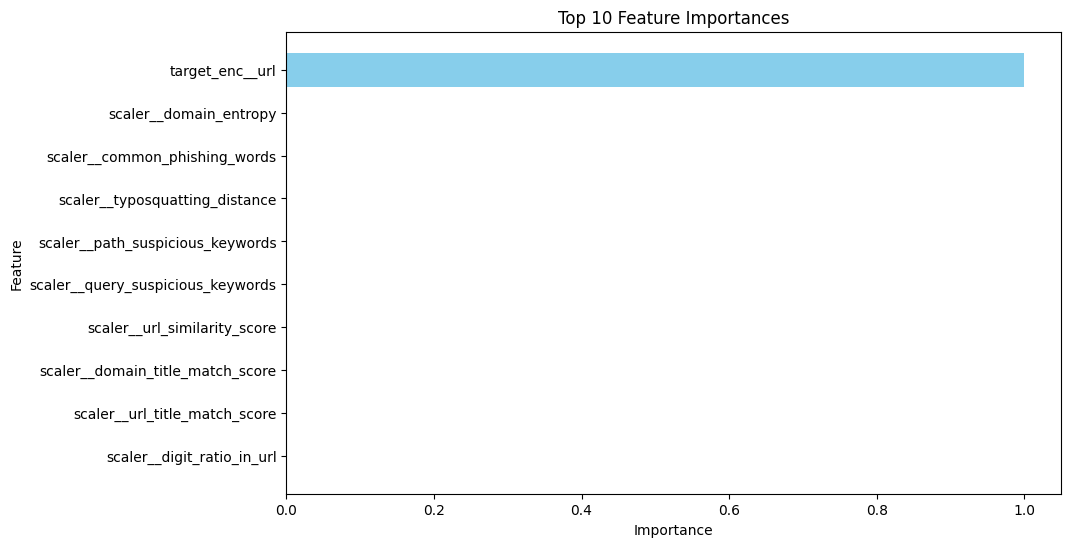

In [521]:
import matplotlib.pyplot as plt


# Map feature importances to feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Importance': importances
})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [526]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA



class PreprocessingPipelineWithPCA(BaseEstimator, TransformerMixin):
    def __init__(self, target_column, n_components=0.95):
        self.target_column = target_column
        self.n_components = n_components
        self.pipeline = None  # Initialize in fit method

    def _build_pipeline(self):
        # Define feature groups as class-level attributes
        boolean_features = [
            'is_website_live','has_ip_address','shortened_url',
            'has_hyphen','contains_homograph_chars','has_brand_name_in_domain',
            'has_social_net', 'has_redirect','url_is_random','title_is_random',
            'description_is_random','is_expired'
            ]

        low_cardinality_categorical_features = [
            'title_similarity_bin', 'description_similarity_bin','similarity_bin','registration_type',
            'expiration_risk'
        ]

        high_cardinality_categorical_features = [
            'url', 'title', 'description', 'tld', 'domain'
        ]

        numeric_features = [
            'url_length','num_subdirectories', 'num_query_params', 'is_https',
            'num_subdomains','domain_length','total_links','external_links',
            'path_length','num_slashes','domain_entropy','char_repetition','common_phishing_words',
            'typosquatting_distance','path_suspicious_keywords','query_suspicious_keywords',
            'url_similarity_score','domain_title_match_score','url_title_match_score',
            'digit_ratio_in_url','domain_age','days_to_expiry','registration_duration'
        ]

        preprocessing_pipeline = ColumnTransformer(
            transformers=[
                ('target_enc', TargetEncoder(), high_cardinality_categorical_features),
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), low_cardinality_categorical_features),
                ('scaler', StandardScaler(), numeric_features)
            ], remainder='passthrough'
        )

        return Pipeline(steps=[
            ('preprocessor', preprocessing_pipeline),
            ('pca', PCA(n_components=self.n_components))
        ])

    def fit(self, X, y=None):
        self.pipeline = self._build_pipeline()
        self.pipeline.fit(X, y)
        return self

    def transform(self, X, y=None):
        return self.pipeline.transform(X)



In [527]:
from sklearn.metrics import classification_report, roc_curve, det_curve
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import joblib

# Store model results for DET and ROC plots
model_results = {}

# Train models with PCA, SMOTE, and hyperparameter tuning
fitted_pipelines = {}
for model_name, model in models.items():
    print(f"Training {model_name} with PCA and SMOTE...")

    # Define a full pipeline with SMOTE and the classifier
    pipeline = ImbPipeline([
        ("preprocessing", PreprocessingPipelineWithPCA(target_column='label', n_components=0.95)),
        ("smote", SMOTE(sampling_strategy=1.0, random_state=42)),
        ("classifier", model)
    ])

    # Apply RandomizedSearchCV if parameters are provided
    if model_name in param_grids:
        search = RandomizedSearchCV(
            pipeline, param_distributions=param_grids[model_name], n_iter=10, cv=cv_strategy,
            scoring="f1_macro", random_state=42, n_jobs=-1
        )
        search.fit(X_train, y_train_encoded)  # Using raw X_train since pipeline handles preprocessing
        best_pipeline = search.best_estimator_
        print(f"{model_name} Best Params: {search.best_params_}")
    else:
        best_pipeline = pipeline.fit(X_train, y_train_encoded)

    # Save the trained model pipeline
    joblib.dump(best_pipeline, f'{model_name}.joblib')

    # Predictions and evaluation on test set
    y_pred = best_pipeline.predict(X_test)
    y_prob = best_pipeline.predict_proba(X_test)[:, 1] if hasattr(best_pipeline, "predict_proba") else None

    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test_encoded, y_pred, zero_division=0))

    # Store results for DET and ROC plotting
    model_results[model_name] = {
        "y_true": y_test_encoded,
        "y_prob": y_prob,
        "y_pred": y_pred
    }

    # Evaluate with cross-validation on test data
    cv_score = cross_val_score(best_pipeline, X_test, y_test_encoded, cv=cv_strategy, scoring="f1_macro").mean()
    print(f"{model_name} Test Weighted F1 Score: {cv_score:.4f}")
    print("\n" + "="*50 + "\n")


Training Dummy Classifier with PCA and SMOTE...

Classification Report for Dummy Classifier:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1834
           1       0.00      0.00      0.00      2138

    accuracy                           0.46      3972
   macro avg       0.23      0.50      0.32      3972
weighted avg       0.21      0.46      0.29      3972

Dummy Classifier Test Weighted F1 Score: 0.3159


Training Logistic Regression with PCA and SMOTE...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression Best Params: {'classifier__solver': 'lbfgs', 'classifier__C': 10}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1834
           1       0.95      0.91      0.93      2138

    accuracy                           0.92      3972
   macro avg       0.92      0.92      0.92      3972
weighted avg       0.92      0.92      0.92      3972

Logistic Regression Test Weighted F1 Score: 0.9172


Training Random Forest with PCA and SMOTE...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Best Params: {'classifier__n_estimators': 100, 'classifier__max_depth': 20}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1834
           1       0.98      0.89      0.93      2138

    accuracy                           0.93      3972
   macro avg       0.93      0.93      0.93      3972
weighted avg       0.94      0.93      0.93      3972

Random Forest Test Weighted F1 Score: 0.9292


Training Gradient Boosting with PCA and SMOTE...
Gradient Boosting Best Params: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.1}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1834
           1       0.97      0.90      0.94      2138

    accuracy                           0.93      3972
   macro avg       0.93      0.94      0.93      3972


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Support Vector Machine Best Params: {'classifier__kernel': 'rbf'}

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1834
           1       0.99      0.88      0.94      2138

    accuracy                           0.93      3972
   macro avg       0.94      0.94      0.93      3972
weighted avg       0.94      0.93      0.93      3972

Support Vector Machine Test Weighted F1 Score: 0.9297


Training XGBoost with PCA and SMOTE...
XGBoost Best Params: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.1}

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1834
           1       0.97      0.91      0.94      2138

    accuracy                           0.93      3972
   macro avg       0.93      0.94      0.93      3972
weighted avg       0.94      0.93   

In [537]:
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import joblib

# Store model results for DET and ROC plots
model_results = {}

# Train models with PCA, SMOTE, and hyperparameter tuning
fitted_pipelines = {}
for model_name, model in models.items():
    print(f"Training {model_name} with PCA and SMOTE...")

    # Define a full pipeline with SMOTE and the classifier
    pipeline = ImbPipeline([
        ("preprocessing", PreprocessingPipelineWithPCA(target_column='label', n_components=0.95)),
        ("smote", SMOTE(sampling_strategy=1.0, random_state=42)),
        ("classifier", model)
    ])

    # Apply RandomizedSearchCV if parameters are provided
    if model_name in param_grids:
        search = RandomizedSearchCV(
            pipeline, param_distributions=param_grids[model_name], n_iter=10, cv=cv_strategy,
            scoring="f1_macro", random_state=42, n_jobs=-1
        )
        search.fit(X_train, y_train_encoded)  # Using raw X_train since pipeline handles preprocessing
        best_pipeline = search.best_estimator_
        print(f"{model_name} Best Params: {search.best_params_}")
    else:
        best_pipeline = pipeline.fit(X_train, y_train_encoded)

    # Save the trained model pipeline
    joblib.dump(best_pipeline, f'{model_name}.joblib')

    # Evaluate on training data for overfitting/underfitting check
    y_train_pred = best_pipeline.predict(X_train)
    train_f1_score = f1_score(y_train_encoded, y_train_pred, average="macro")
    print(f"{model_name} Training F1 Score: {train_f1_score:.4f}")

    # Predictions and evaluation on test set
    y_test_pred = best_pipeline.predict(X_test)
    y_test_prob = best_pipeline.predict_proba(X_test)[:, 1] if hasattr(best_pipeline, "predict_proba") else None
    test_f1_score = f1_score(y_test_encoded, y_test_pred, average="macro")

    # Print classification report for test set
    print(f"\nClassification Report for {model_name} on Test Set:")
    print(classification_report(y_test_encoded, y_test_pred, zero_division=0))

    # Store results for DET and ROC plotting
    model_results[model_name] = {
        "y_true": y_test_encoded,
        "y_prob": y_test_prob,
        "y_pred": y_test_pred,
        "train_f1_score": train_f1_score,
        "test_f1_score": test_f1_score,
        "cv_score": cv_score
    }


    # Evaluate with cross-validation on test data
    cv_score = cross_val_score(best_pipeline, X_test, y_test_encoded, cv=cv_strategy, scoring="f1_macro").mean()
    print(f"{model_name} Cross-Validation F1 Score on Test Set: {cv_score:.4f}")
    print(f"{model_name} Test F1 Score: {test_f1_score:.4f}")

    # Compare train and test F1 scores to detect overfitting/underfitting
    if train_f1_score > test_f1_score + 0.1:
        print(f"Warning: Potential Overfitting in {model_name} (Train F1: {train_f1_score:.4f}, Test F1: {test_f1_score:.4f})")
    elif train_f1_score < test_f1_score - 0.1:
        print(f"Warning: Potential Underfitting in {model_name} (Train F1: {train_f1_score:.4f}, Test F1: {test_f1_score:.4f})")
    else:
        print(f"{model_name} appears to have a good fit.")

    print("\n" + "="*50 + "\n")


Training Dummy Classifier with PCA and SMOTE...
Dummy Classifier Training F1 Score: 0.3169

Classification Report for Dummy Classifier on Test Set:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1834
           1       0.00      0.00      0.00      2138

    accuracy                           0.46      3972
   macro avg       0.23      0.50      0.32      3972
weighted avg       0.21      0.46      0.29      3972

Dummy Classifier Cross-Validation F1 Score on Test Set: 0.3159
Dummy Classifier Test F1 Score: 0.3159
Dummy Classifier appears to have a good fit.


Training Logistic Regression with PCA and SMOTE...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression Best Params: {'classifier__solver': 'lbfgs', 'classifier__C': 10}
Logistic Regression Training F1 Score: 0.9271

Classification Report for Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1834
           1       0.95      0.91      0.93      2138

    accuracy                           0.92      3972
   macro avg       0.92      0.92      0.92      3972
weighted avg       0.92      0.92      0.92      3972

Logistic Regression Cross-Validation F1 Score on Test Set: 0.9172
Logistic Regression Test F1 Score: 0.9230
Logistic Regression appears to have a good fit.


Training Random Forest with PCA and SMOTE...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Best Params: {'classifier__n_estimators': 50, 'classifier__max_depth': 20}
Random Forest Training F1 Score: 0.9997

Classification Report for Random Forest on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1834
           1       0.98      0.89      0.93      2138

    accuracy                           0.93      3972
   macro avg       0.93      0.93      0.93      3972
weighted avg       0.93      0.93      0.93      3972

Random Forest Cross-Validation F1 Score on Test Set: 0.9294
Random Forest Test F1 Score: 0.9307
Random Forest appears to have a good fit.


Training Gradient Boosting with PCA and SMOTE...
Gradient Boosting Best Params: {'classifier__n_estimators': 100, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.1}
Gradient Boosting Training F1 Score: 0.9993

Classification Report for Gradient Boosting on Test Set:
              precision    recall  f1-score   support

           0     

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Support Vector Machine Best Params: {'classifier__kernel': 'rbf'}
Support Vector Machine Training F1 Score: 0.9449

Classification Report for Support Vector Machine on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1834
           1       0.99      0.88      0.94      2138

    accuracy                           0.93      3972
   macro avg       0.94      0.94      0.93      3972
weighted avg       0.94      0.93      0.93      3972

Support Vector Machine Cross-Validation F1 Score on Test Set: 0.9297
Support Vector Machine Test F1 Score: 0.9340
Support Vector Machine appears to have a good fit.


Training XGBoost with PCA and SMOTE...
XGBoost Best Params: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.1}
XGBoost Training F1 Score: 1.0000

Classification Report for XGBoost on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.97  

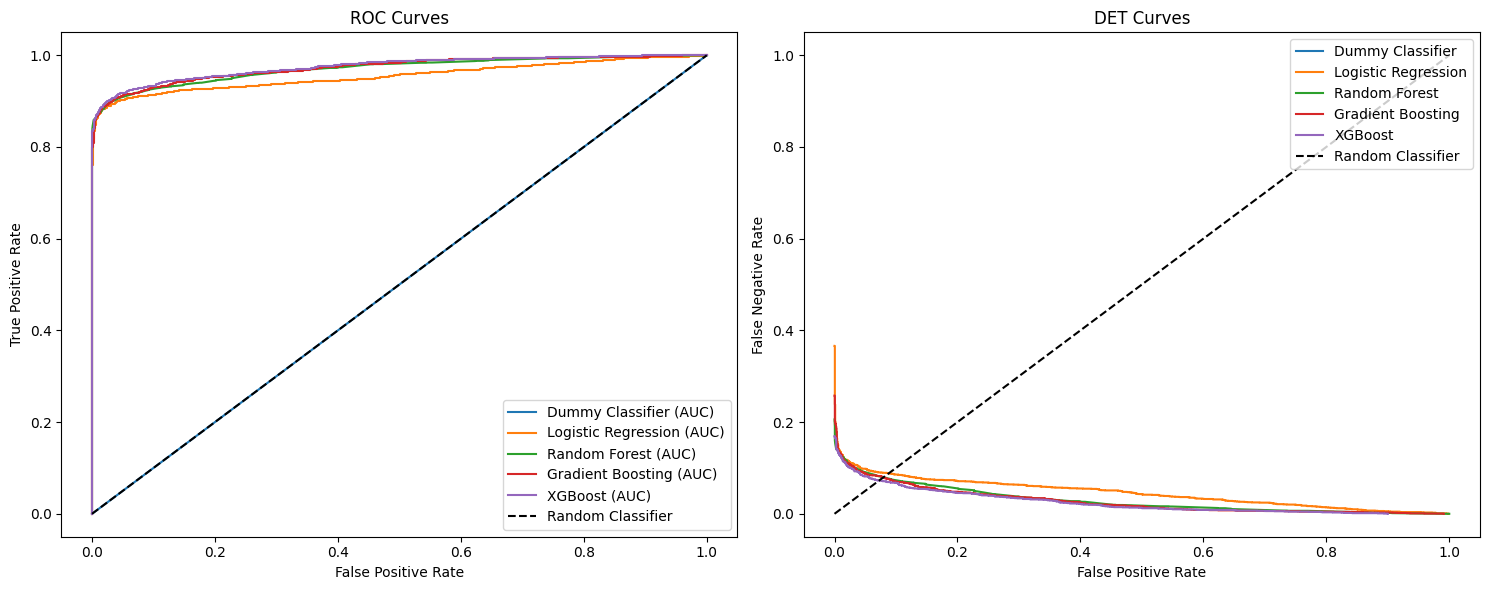

In [538]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, det_curve

# Plot ROC and DET curves for each model
plt.figure(figsize=(15, 6))

# Subplot for ROC curves
plt.subplot(1, 2, 1)
for model_name, results in model_results.items():
    if results["y_prob"] is not None:  # Ensure the model has probability outputs
        fpr, tpr, _ = roc_curve(results["y_true"], results["y_prob"])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC)")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

# Subplot for DET curves
plt.subplot(1, 2, 2)
for model_name, results in model_results.items():
    if results["y_prob"] is not None:
        fpr, fnr, _ = det_curve(results["y_true"], results["y_prob"])
        plt.plot(fpr, fnr, label=f"{model_name}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("DET Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


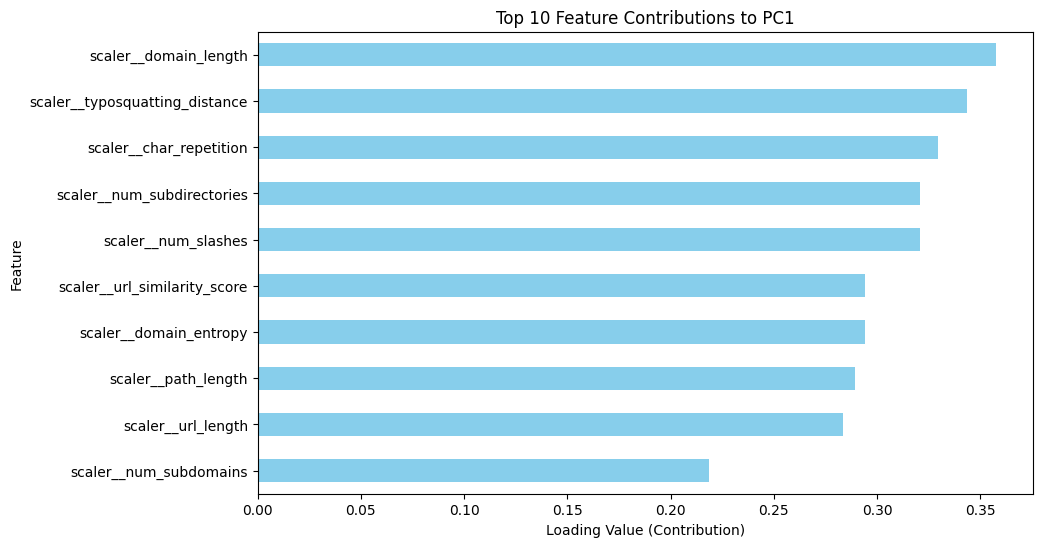

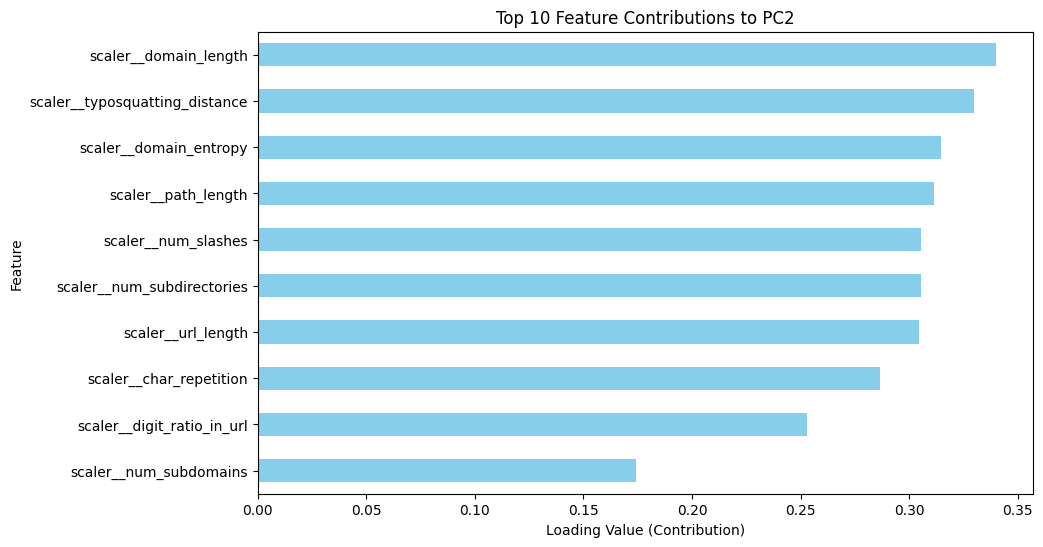

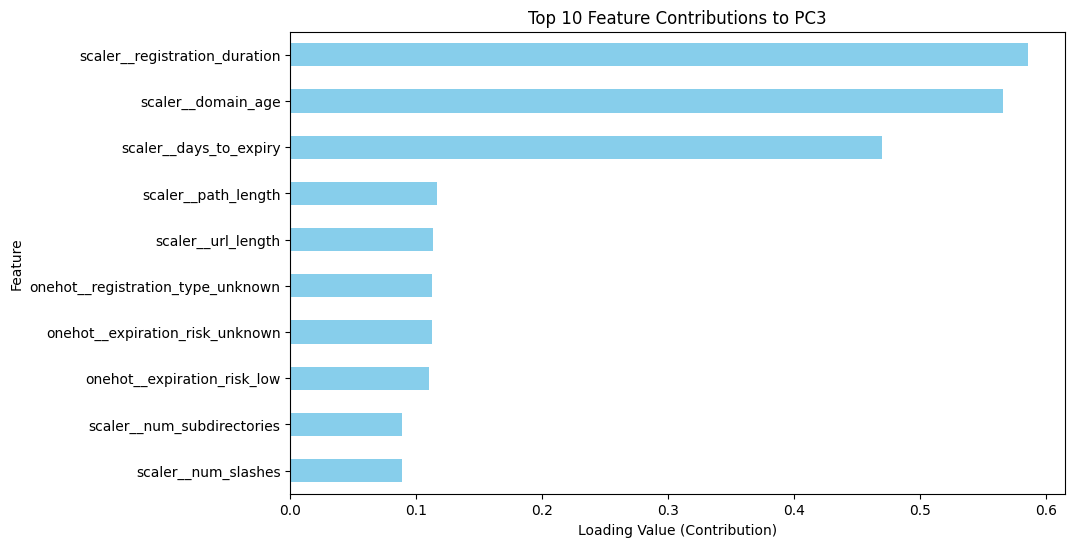

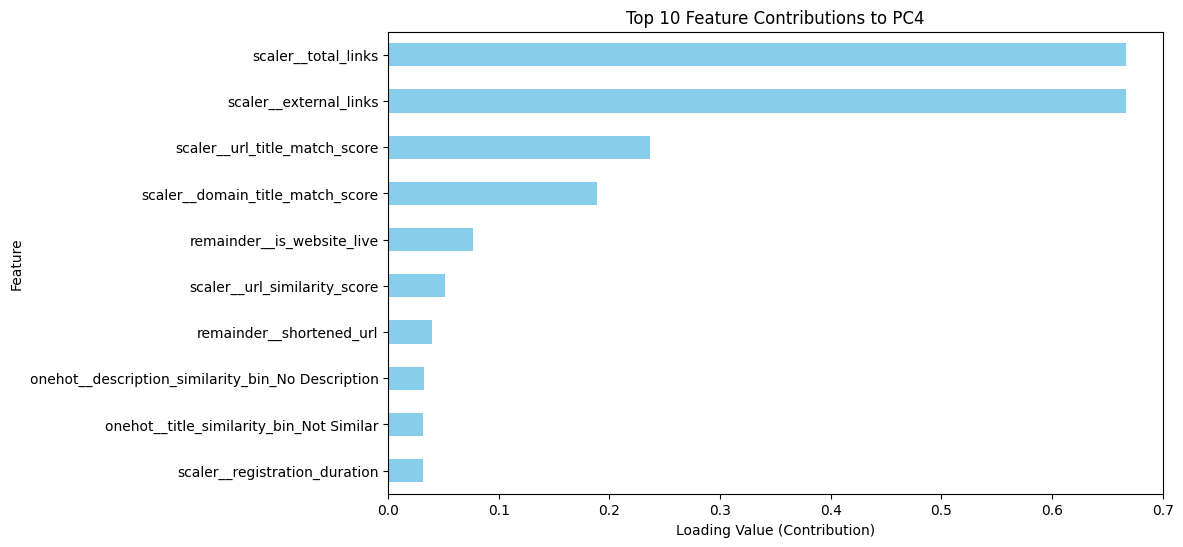

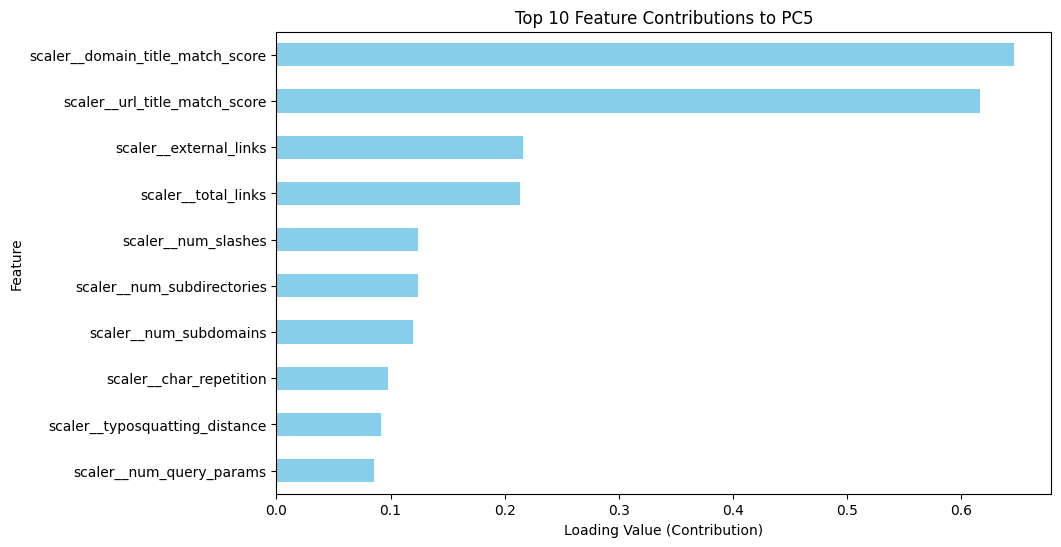


Explained Variance by Principal Component:
   Principal Component  Explained Variance Ratio
0                  PC1                  0.194658
1                  PC2                  0.134459
2                  PC3                  0.109367
3                  PC4                  0.086870
4                  PC5                  0.070463
5                  PC6                  0.051211
6                  PC7                  0.044318
7                  PC8                  0.043048
8                  PC9                  0.040955
9                 PC10                  0.040460
10                PC11                  0.032489
11                PC12                  0.029002
12                PC13                  0.025533
13                PC14                  0.022208
14                PC15                  0.017905
15                PC16                  0.015052


In [539]:
# Assuming we have the best pipeline from the search
best_pipeline = search.best_estimator_  # example from the trained model with PCA
pca = best_pipeline.named_steps['preprocessing'].pipeline.named_steps['pca']

# Retrieve feature names after preprocessing (before PCA)
# Since ColumnTransformer may transform feature names, we extract them from the preprocessing pipeline
preprocessor = best_pipeline.named_steps['preprocessing'].pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

# Retrieve PCA components (loadings) and explained variance
loadings = pca.components_  # Shape: [n_components, n_features]
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame with loadings and feature names
loading_df = pd.DataFrame(loadings.T, index=feature_names, columns=[f"PC{i+1}" for i in range(loadings.shape[0])])

# Sort and plot the top features for each principal component
n_top_features = 10  # Number of top contributing features to plot per component

# Loop over each component to identify and plot top contributing features
for i, pc in enumerate(loading_df.columns[:min(5, loadings.shape[0])]):  # Limiting to first few PCs for readability
    top_features = loading_df[pc].abs().sort_values(ascending=False).head(n_top_features)
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh', color='skyblue')
    plt.title(f"Top {n_top_features} Feature Contributions to {pc}")
    plt.xlabel("Loading Value (Contribution)")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()  # Highest contributions at the top
    plt.show()

# Summary of explained variance
explained_variance_df = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance Ratio": explained_variance
})
print("\nExplained Variance by Principal Component:")
print(explained_variance_df)


Scores DataFrame:
                    Model  Train F1 Score  Test F1 Score  \
0        Dummy Classifier        0.316936       0.315880   
1     Logistic Regression        0.927102       0.923007   
2           Random Forest        0.999663       0.930699   
3       Gradient Boosting        0.999325       0.930414   
4  Support Vector Machine        0.944911       0.934015   
5                 XGBoost        1.000000       0.934171   
6       simple perceptron        0.859898       0.858480   

   Cross-Validation F1 Score  
0                   0.917179  
1                   0.315880  
2                   0.917179  
3                   0.929437  
4                   0.923056  
5                   0.929732  
6                   0.927835  


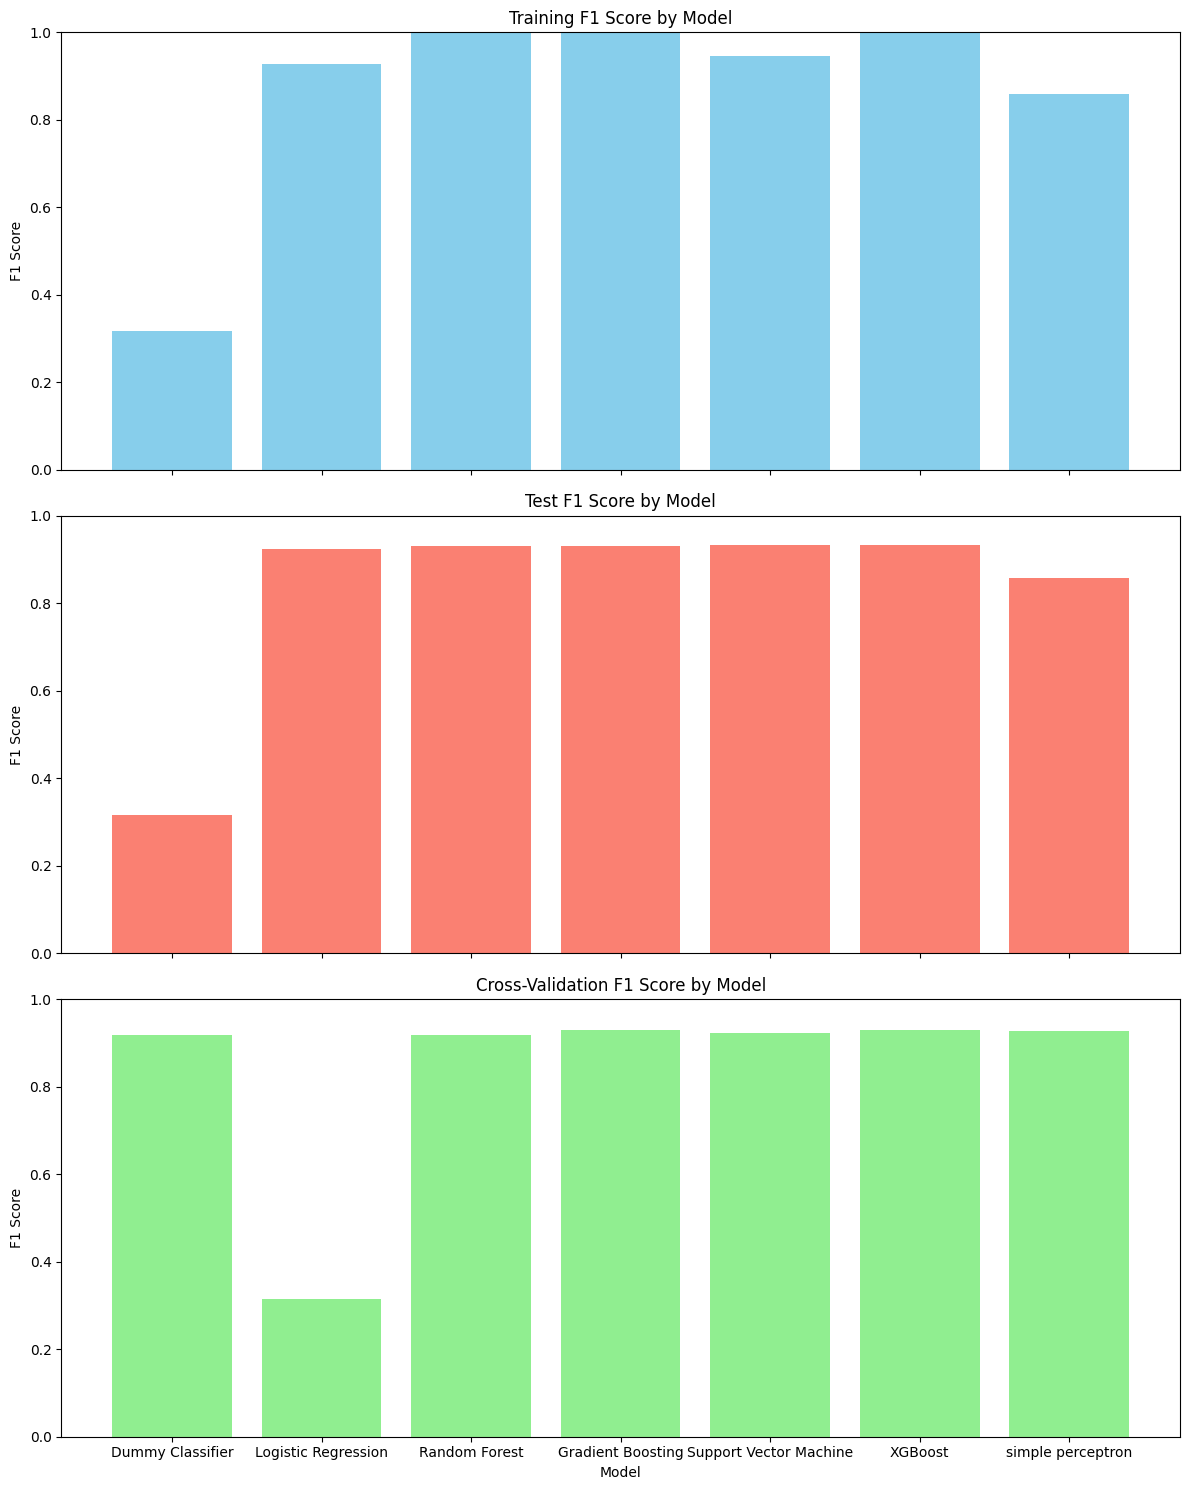

In [541]:
import matplotlib.pyplot as plt
import pandas as pd

# Store results for each model's performance on training, test, and cross-validation scores
model_scores = {
    'Model': [],
    'Train F1 Score': [],
    'Test F1 Score': [],
    'Cross-Validation F1 Score': []
}

# Populate model_scores with available data from model_results
for model_name, result in model_results.items():
    # Retrieve scores; if missing, set to 0
    train_f1_score = result.get('train_f1_score', 0)
    test_f1_score = result.get('test_f1_score', 0)
    cv_score = result.get('cv_score', 0)

    # Append data to model_scores dictionary
    model_scores['Model'].append(model_name)
    model_scores['Train F1 Score'].append(train_f1_score)
    model_scores['Test F1 Score'].append(test_f1_score)
    model_scores['Cross-Validation F1 Score'].append(cv_score)

# Convert model_scores to DataFrame and display for debugging
scores_df = pd.DataFrame(model_scores)
print("Scores DataFrame:")
print(scores_df)  # Debug print to check if data is populated correctly

# Check if scores_df has data before plotting
if scores_df.empty or scores_df[['Train F1 Score', 'Test F1 Score', 'Cross-Validation F1 Score']].isnull().all().all():
    print("No data available for plotting.")
else:
    # Plotting Training, Test, and Cross-Validation F1 Scores
    fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

    # Training F1 Score
    axes[0].bar(scores_df['Model'], scores_df['Train F1 Score'], color='skyblue')
    axes[0].set_title('Training F1 Score by Model')
    axes[0].set_ylabel('F1 Score')
    axes[0].set_ylim(0, 1)

    # Test F1 Score
    axes[1].bar(scores_df['Model'], scores_df['Test F1 Score'], color='salmon')
    axes[1].set_title('Test F1 Score by Model')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_ylim(0, 1)

    # Cross-Validation F1 Score
    axes[2].bar(scores_df['Model'], scores_df['Cross-Validation F1 Score'], color='lightgreen')
    axes[2].set_title('Cross-Validation F1 Score by Model')
    axes[2].set_ylabel('F1 Score')
    axes[2].set_xlabel('Model')
    axes[2].set_ylim(0, 1)

    # Display the plots
    plt.tight_layout()
    plt.show()


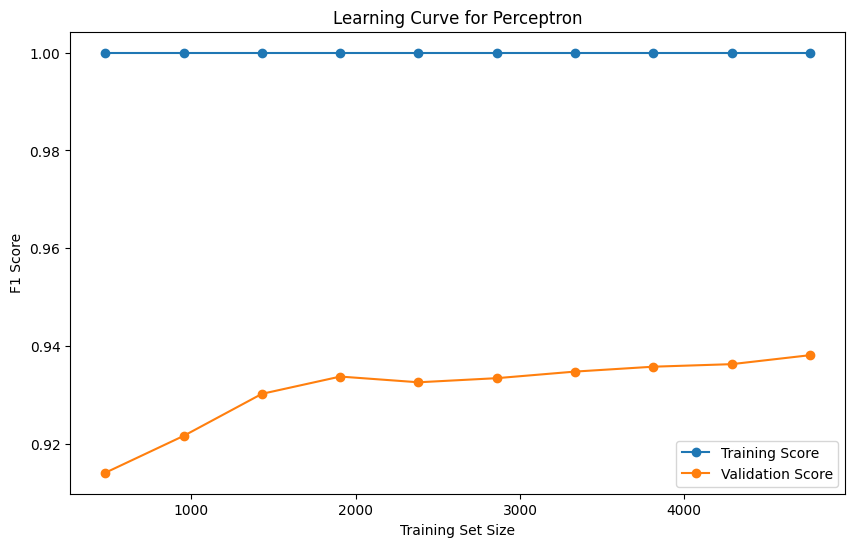

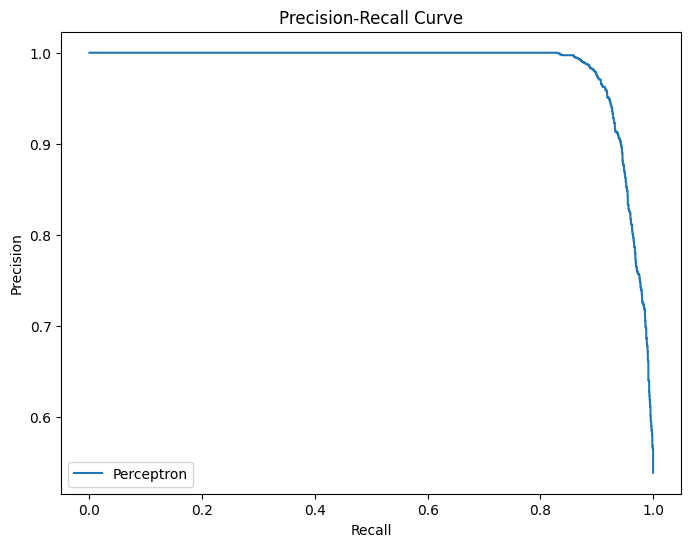

In [542]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve, roc_curve, det_curve

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    best_pipeline, X_train, y_train_encoded, cv=5, scoring="f1_macro", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score", marker='o')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label="Validation Score", marker='o')
plt.title("Learning Curve for Perceptron")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.show()

# Precision-Recall Curve
y_scores = best_pipeline.decision_function(X_test) if hasattr(best_pipeline, "decision_function") else best_pipeline.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_encoded, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Perceptron")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.show()




In [559]:
test_data = pd.read_json('/content/10_30_2024_01_45_07.json')

In [560]:
test_data.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,details,target
0,8822307,https://teb3msd.top,http://www.phishtank.com/phish_detail.php?phis...,2024-10-29 00:50:23+00:00,yes,2024-10-29 01:03:22+00:00,yes,"[{'ip_address': '103.254.73.37', 'cidr_block':...",Other
1,8822305,https://rtd-1060rt03.weeblysite.com/,http://www.phishtank.com/phish_detail.php?phis...,2024-10-29 00:41:31+00:00,yes,2024-10-29 00:43:00+00:00,yes,"[{'ip_address': '74.115.51.54', 'cidr_block': ...",Other
2,8822304,https://nf894xul.com%E2%88%95zuu4n888%E2%88%95...,http://www.phishtank.com/phish_detail.php?phis...,2024-10-29 00:40:24+00:00,yes,2024-10-29 00:43:00+00:00,yes,"[{'ip_address': '172.67.216.179', 'cidr_block'...",Other
3,8822303,https://firebasestorage.googleapis.com/v0/b/se...,http://www.phishtank.com/phish_detail.php?phis...,2024-10-29 00:36:54+00:00,yes,2024-10-29 00:43:00+00:00,yes,"[{'ip_address': '142.250.31.95', 'cidr_block':...",Other
4,8822302,https://tepc.uwcur.icu/jp/,http://www.phishtank.com/phish_detail.php?phis...,2024-10-29 00:27:47+00:00,yes,2024-10-29 00:43:00+00:00,yes,"[{'ip_address': '35.215.127.152', 'cidr_block'...",Other


In [561]:
test_data = test_data[['url']]
test_data.head()

,url
0,https://teb3msd.top
1,https://rtd-1060rt03.weeblysite.com/
2,https://nf894xul.com%E2%88%95zuu4n888%E2%88%95...
3,https://firebasestorage.googleapis.com/v0/b/se...
4,https://tepc.uwcur.icu/jp/


In [562]:
for col in df_with_domain_age.columns:
    print(f"{col}: {df_with_domain_age[col].dtype}")

url: object
label: object
is_website_live: bool
title: object
description: object
title_similarity_bin: object
description_similarity_bin: object
url_length: int64
num_subdirectories: int64
num_query_params: int64
has_ip_address: bool
is_https: int64
has_www: bool
num_subdomains: int64
domain_length: int64
tld: object
total_links: int64
external_links: int64
path_length: int64
num_slashes: int64
shortened_url: bool
domain_entropy: float64
has_hyphen: bool
char_repetition: int64
common_phishing_words: int64
typosquatting_distance: int64
contains_homograph_chars: bool
has_brand_name_in_domain: bool
has_social_net: bool
path_suspicious_keywords: int64
query_suspicious_keywords: int64
has_redirect: bool
url_is_random: bool
title_is_random: bool
description_is_random: bool
url_similarity_score: float64
similarity_bin: object
domain: object
domain_title_match_score: float64
url_title_match_score: float64
digit_ratio_in_url: float64
domain_age: int64
days_to_expiry: int64
is_expired: bool
reg

In [563]:
test_sample = test_data.sample(10, random_state=42)

In [564]:
test_sample.head()

,url
27733,https://q-r.to/bfKL2Z
67528,https://a.araceli-newerafinancialgrp.workers.dev/
61650,http://dsk-financial.com
52681,https://docs.google.com/presentation/d/e/2PACX...
7836,https://bit.ly/3NgkQt5


In [575]:
import pandas as pd
import asyncio
import logging

# Configure logging for debugging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

def prepare_urls_for_modeling(data, url_column='url', title_column='title', ref_urls=None, config=None):
    """
    Wrapper function to preprocess a DataFrame of URLs for modeling.

    Parameters:
    - data (pd.DataFrame): A DataFrame containing a URL column.
    - url_column (str): The column name for URLs.
    - title_column (str): The column name for page titles.
    - ref_urls (List[str]): List of reference URLs for similarity computation.
    - config (ProcessorConfig): Configuration settings for URLProcessor.

    Returns:
    - dict: A dictionary with processed DataFrame and feature classifications.
    """
    # Use a default config if none is provided
    if config is None:
        config = ProcessorConfig()

    # Initialize the URLProcessor
    processor = URLProcessor()

    # Step 0: Verify the DataFrame has the URL column
    if url_column not in data.columns:
        logging.error(f"Data must contain a '{url_column}' column.")
        raise ValueError(f"Data must contain a '{url_column}' column.")

    try:
        # Step 1: Extract the primary domain from URLs
        logging.info("Step 1: Extracting primary domain from URLs.")
        processed_data = processor.extract_domain(data, url_column)
        logging.debug(f"Step 1 completed. Sample data:\n{processed_data[[url_column, 'domain']].head()}")

        # Step 2: Fetch metadata asynchronously and add results to the DataFrame
        logging.info("Step 2: Fetching metadata for URLs.")
        processed_data = asyncio.run(processor.process_urls_metadata(processed_data, url_column))
        logging.debug(f"Step 2 completed. Sample data:\n{processed_data.head()}")

        # Step 3: Compute content similarity for titles and descriptions
        logging.info("Step 3: Computing content similarity for titles and descriptions.")
        processed_data = processor.compute_content_similarity(processed_data, url_column)
        logging.debug(f"Step 3 completed. Sample data:\n{processed_data.head()}")

        # Step 4: Extract basic URL features
        logging.info("Step 4: Extracting basic URL features.")
        processed_data = processor.extract_url_features(processed_data, url_column)
        logging.debug(f"Step 4 completed. Sample data:\n{processed_data.head()}")

        # Step 5: Fetch and update WHOIS data
        logging.info("Step 5: Fetching WHOIS data for URLs.")
        processed_data = asyncio.run(processor.process_whois_data(processed_data, url_column))
        logging.debug(f"Step 5 completed. Sample data:\n{processed_data.head()}")

        # Step 6: Fetch link metadata (total and external links)
        logging.info("Step 6: Fetching link metadata for URLs.")
        processed_data = asyncio.run(processor.process_links_metadata(processed_data, url_column))
        logging.debug(f"Step 6 completed. Sample data:\n{processed_data.head()}")

        # Step 7: Extract advanced phishing detection features
        logging.info("Step 7: Extracting advanced phishing detection features.")
        processed_data = processor.extract_url_features(processed_data, url_column)
        logging.debug(f"Step 7 completed. Sample data:\n{processed_data.head()}")

        # Step 8: Compute similarity to reference URLs if provided
        if ref_urls:
            logging.info("Step 8: Computing URL similarity to reference URLs.")
            processed_data = processor.compute_url_similarity_batch(processed_data, url_column, ref_urls)
            logging.debug(f"Step 8 completed. Sample data:\n{processed_data.head()}")

        # Step 9: Calculate domain-title and URL-title match scores if title column is present
        if title_column in data.columns:
            logging.info("Step 9: Calculating domain-title and URL-title match scores.")
            processed_data = processor.calculate_domain_title_match_score(processed_data, url_column, title_column)
            processed_data = processor.calculate_url_title_match_score(processed_data, url_column, title_column)
            logging.debug(f"Step 9 completed. Sample data:\n{processed_data.head()}")

        # Step 10: Calculate the digit ratio in URLs
        logging.info("Step 10: Calculating the digit ratio in URLs.")
        processed_data = processor.calculate_digit_ratio_in_url(processed_data, url_column)
        logging.debug(f"Step 10 completed. Sample data:\n{processed_data.head()}")

        # Step 11: Classify features for encoding
        logging.info("Step 11: Classifying features for encoding.")
        feature_classes = processor.classify_features(processed_data)
        logging.debug(f"Step 11 completed. Feature classifications:\n{feature_classes}")

    except Exception as e:
        logging.error(f"An error occurred during preprocessing: {e}")
        raise

    return {
        "processed_data": processed_data,
        "feature_classes": feature_classes
    }


In [576]:
ref_urls = reference_urls

In [594]:

# Call prepare_urls_for_modeling function
results = prepare_urls_for_modeling(
    data=test_sample,
    url_column='url',            # Specify the URL column
    title_column='title',         # Specify the title column (optional)
    ref_urls=reference_urls       # Pass reference URLs (optional)
)

# Unpack the results
processed_data = results["processed_data"]
feature_classes = results["feature_classes"]

# Display results
print("Processed Data:")
print(processed_data.head())

print("\nFeature Classifications:")
for key, features in feature_classes.items():
    print(f"{key}: {features}")


ERROR:root:An error occurred during preprocessing: 'URLProcessor' object has no attribute 'process_urls_metadata'


AttributeError: 'URLProcessor' object has no attribute 'process_urls_metadata'

In [595]:
# Check available methods in URLProcessor to confirm the new methods are there
processor = URLProcessor()
print([method for method in dir(processor) if not method.startswith("__")])


['extract_domain']
